In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

In [171]:
# Read dfs
df_cdb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-cdb-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)
df_heb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-heb-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)

In [172]:
df_heb

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
0              1  11777     1801  18.06  2021-10-24 19:22:00         342116   
1              2  11778     1801  12.92  2021-10-25 22:31:00         342189   
2              3  11779     1801  18.89  2021-10-26 16:23:00         342319   
3              4  11780     1801  33.62  2021-10-27 22:27:00         342494   
4              5  11781     1801  33.89  2021-10-28 23:54:00         342675   
...          ...    ...      ...    ...                  ...            ...   
1049        1092   4157     7902  42.90  2022-09-24 12:26:00         210855   
1050        1093   4158     7902  40.00  2022-09-26 05:12:00         211074   
1051        1094   4159     7902  45.10  2022-09-27 05:27:00         211255   
1052        1095   4160     7902  31.20  2022-09-27 17:24:00         211435   
1053        1096   4161     7902  29.00  2022-09-28 17:42:00         211473   

     Fuel Orfluid Type Powertrain        dist     Energy  
0                  DIE     hybrid   83.444643  20.282849  
1                  DIE     hybrid   69.930203  15.787935  
2                  DIE     hybrid   86.627045  17.991003  
3                  DIE     hybrid  169.317110  36.326896  
4                  DIE     hybrid  103.195411  28.533658  
...                ...        ...         ...        ...  
1049               DIE     hybrid  167.083683  45.262162  
1050               DIE     hybrid  141.516849  49.468162  
1051               DIE     hybrid  141.479092  34.244411  
1052               DIE     hybrid   87.480069  18.547878  
1053               DIE     hybrid   87.480220  18.307039  

[1054 rows x 10 columns]

## Data exploration and cleaning

In [173]:
df_cdb.loc[df_cdb['Energy']<=0]

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
30             31   4760     1510   2.66  2021-11-18 15:56:00         753966   
86             87   4816     1510  28.42  2022-02-08 17:40:00              0   
94             95   4824     1510   1.15  2022-02-18 16:25:00         762463   
111           113   4842     1513  37.72  2021-11-16 17:59:00         484098   
116           118   4847     1513  16.15  2021-11-21 17:56:00         484679   
...           ...    ...      ...    ...                  ...            ...   
26391       26542   3585     7816   7.10  2022-03-28 16:01:00          24708   
26449       26600   3643     7816   2.70  2022-06-15 05:20:00          31956   
26454       26605   3648     7816   3.60  2022-06-20 05:35:00          32513   
26455       26606   3649     7816  20.30  2022-06-20 05:38:00          32513   
26458       26609   3652     7816   5.00  2022-06-21 17:06:00          32707   

      Fuel Orfluid Type    Powertrain  dist  Energy  
30                  DIE  conventional   0.0     0.0  
86                  DIE  conventional   0.0     0.0  
94                  DIE  conventional   0.0     0.0  
111                 DIE  conventional   0.0     0.0  
116                 DIE  conventional   0.0     0.0  
...                 ...           ...   ...     ...  
26391               DIE  conventional   0.0     0.0  
26449               DIE  conventional   0.0     0.0  
26454               DIE  conventional   0.0     0.0  
26455               DIE  conventional   0.0     0.0  
26458               DIE  conventional   0.0     0.0  

[1302 rows x 10 columns]

In [174]:
df_cdb.loc[df_cdb['Energy']>150]

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
3197         3223   8593     1576   8.06  2022-03-29 15:59:00         305279   
6418         6471  10056     1659  16.58  2022-05-16 22:19:00         258247   
6946         7003  10443     1663   9.60  2021-11-01 16:30:00         313643   
13186       13273  11283     1813  17.29  2022-03-28 16:15:00         337677   
13716       13806  11707     1816  61.44  2021-12-20 19:05:00         335708   
17590       17701  16190     1843  33.83  2021-11-08 18:39:00         247483   

      Fuel Orfluid Type    Powertrain        dist      Energy  
3197                DIE  conventional   18.744720  187.125342  
6418                DIE  conventional   66.576244  214.925902  
6946                DIE  conventional   28.208802  204.521849  
13186               DIE  conventional   42.616553  211.986598  
13716               DIE  conventional  148.879116  259.575446  
17590               DIE  conventional  190.771916  327.497479

In [175]:
df_heb.loc[df_heb['Energy']>150]

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
495         517  12213     1804  38.63  2022-03-02 20:45:00         357713   

    Fuel Orfluid Type Powertrain       dist      Energy  
495               DIE     hybrid  134.64332  220.012089

In [178]:
df_cdb.loc[(df_cdb['Qty'] < 2)] 

Unnamed: 0  index  Vehicle   Qty      ServiceDateTime  Meter1Reading  \
85             86   4815     1510  0.32  2022-02-08 17:38:00         761377   
94             95   4824     1510  1.15  2022-02-18 16:25:00         762463   
135           137   4866     1513  0.95  2022-01-14 11:42:00         486571   
136           138   4867     1513  0.81  2022-01-14 15:36:00         486571   
146           149   4878     1515  0.04  2021-10-08 18:56:00              0   
...           ...    ...      ...   ...                  ...            ...   
26337       26488   3531     7816  0.20  2022-01-26 18:33:00          17715   
26343       26494   3537     7816  0.80  2022-01-31 17:26:00          18509   
26367       26518   3561     7816  0.40  2022-03-01 18:38:00          22181   
26390       26541   3584     7816  0.20  2022-03-28 16:00:00          24708   
26453       26604   3647     7816  0.20  2022-06-20 05:35:00          32513   

      Fuel Orfluid Type    Powertrain       dist     Energy  
85                  DIE  conventional  78.455949  30.875841  
94                  DIE  conventional   0.000000   0.000000  
135                 DIE  conventional  20.460166   5.188124  
136                 DIE  conventional   0.000000   0.000000  
146                 DIE  conventional   0.000000   0.000000  
...                 ...           ...        ...        ...  
26337               DIE  conventional  70.480251  20.938424  
26343               DIE  conventional  87.467503  24.303672  
26367               DIE  conventional  70.480100  21.121718  
26390               DIE  conventional   0.000000   0.000000  
26453               DIE  conventional  87.779789  23.252124  

[525 rows x 10 columns]

In [ ]:
df_heb.loc[(df_heb['Qty'] < 2)] 

In [118]:
df_heb.loc[(df_heb['Qty'] < 2)] 

Empty DataFrame
Columns: [Unnamed: 0, index, Vehicle, Qty, ServiceDateTime, Meter1Reading, Fuel Orfluid Type, Powertrain, dist, Energy, residual, economy]
Index: []

In [129]:
df_cdb.loc[(df_cdb['Qty'] < 5) & (df_cdb['Energy'] > 40)]

Unnamed: 0  index  Vehicle   Qty      ServiceDateTime  Meter1Reading  \
2125         2144  23220     1568  0.43  2022-08-15 23:10:00         300051   
3911         3945   5960     1640  1.87  2022-01-19 15:43:00         239613   
4273         4311   6265     1644  2.38  2021-10-26 17:49:00         359740   
4277         4315   6269     1644  3.44  2021-10-29 22:13:00         360082   
4280         4318   6272     1644  0.41  2021-11-02 22:29:00         360471   
4309         4347   6301     1644  0.39  2022-01-20 22:05:00         363618   
4404         4443   6397     1645  2.13  2021-11-30 22:05:00         358670   
5748         5797   9536     1655  0.05  2022-01-18 22:18:00         270480   
5921         5971   9651     1656  0.47  2022-01-20 23:29:00         286797   
6766         6821  24096     1661  0.27  2022-08-29 20:47:00         196609   
6874         6930  10405     1662  0.05  2022-03-10 17:50:00              0   
10450       10523  18536     1719  0.01  2022-01-18 21:43:00          71747   
11241       11317  20510     1722  0.49  2022-01-28 22:19:00          28288   
11306       11382  20575     1722  0.45  2022-04-07 23:15:00          37275   
11801       11879  22300     1724  3.08  2022-06-27 21:51:00          11706   
11990       12069  27775     1725  4.62  2022-08-17 21:48:00          17928   
12747       12832  10955     1811  4.11  2021-12-10 21:42:00         322566   
13275       13363  11355     1814  0.47  2021-10-30 21:25:00         336367   
13738       13828  11729     1816  0.05  2022-01-18 22:22:00         338593   
14338       14432  12849     1821  4.40  2022-03-22 22:27:00         333195   
14368       14462  12879     1821  3.30  2022-05-20 16:04:00              0   
14505       14600  12987     1822  0.05  2022-01-16 19:31:00         325369   
15884       15987  13987     1833  0.06  2022-01-18 22:15:00         270248   
15974       16077  14077     1833  0.04  2022-05-07 21:45:00         283511   
16021       16124  25247     1833  4.10  2022-08-19 23:28:00         289681   
16341       16446  14348     1835  3.83  2021-11-29 23:12:00         236390   
16369       16474  14376     1835  2.68  2021-12-30 23:18:00         239611   
16378       16483  14385     1835  3.59  2022-01-06 22:18:00         240926   
16390       16495  14397     1835  0.05  2022-01-18 21:45:00         242696   
16395       16500  14402     1835  2.73  2022-01-21 21:49:00         243125   
17635       17746  16235     1843  0.04  2022-01-18 18:28:00         254649   
18261       18376  16699     1847  0.52  2021-11-03 23:12:00         242135   
18668       18785  17027     1849  0.01  2022-01-18 22:09:00         269011   
18914       19032  18918     1850  0.04  2022-03-10 17:38:00              0   
21002       21129  21282     1859  4.97  2021-10-14 23:26:00          16900   
22369       22504    262     7550  0.90  2022-02-14 06:25:00         436667   
22808       22945   1125     7552  0.10  2022-03-14 06:15:00         351363   
23705       23846    528     7660  0.10  2021-11-30 16:09:00         498281   
23944       24086    715     7661  0.20  2021-12-22 21:11:00         458357   
24499       24643   1341     7801  0.40  2022-02-07 05:32:00         370645   
24521       24665   1363     7801  1.20  2022-02-26 11:43:00         372130   
24583       24727   1425     7801  1.90  2022-05-20 06:17:00         379027   
24712       24857   1497     7802  1.50  2021-11-29 05:55:00         395311   
24715       24860   1500     7802  1.50  2021-11-30 05:48:00         395512   
24727       24872   1512     7802  1.20  2021-12-10 06:21:00         396874   
24750       24895   1535     7802  1.40  2022-01-13 05:36:00         399080   
24803       24948   1588     7802  0.10  2022-03-28 05:24:00         404756   
24886       25031   4107     7802  3.20  2022-08-05 14:43:00         416537   
25216       25363   1887     7812  1.60  2021-11-22 04:58:00         345781   
25246       25393   1917     7812  1.40  2021-12-22 06:11

In [179]:
### For CDB: 
# total rows in df_cdb: 26577 
# Remove rowes with Energy==0 (1302)
# Remove rowes with Energy>150 (6)
# Remove rowes with Qty<2 (525)
# Remove rowes with Qty<5 & Energy>50 (56)
# so in total we removed 1889 bad data points which are equivalent to 7% of all the data points

df_cdb = df_cdb.loc[df_cdb['Energy']>0]
df_cdb = df_cdb.loc[df_cdb['Energy']<150]
df_cdb = df_cdb.loc[(df_cdb['Qty'] > 2)] 
df_cdb = df_cdb.loc[~((df_cdb['Qty'] < 5) & (df_cdb['Energy'] > 40))]

In [180]:
### For HEB: 
# total rows in df_cdb: 1054 
# Remove rowes with Energy>150 (1)
# so in total we removed 1 bad data points which are equivalent to 0.01% of all the data points

df_heb = df_heb.loc[df_heb['Energy']<150]

In [181]:
### Compute MAPE contribution for each data point to better analyze the results 
def row_wise_mape(Qty, Energy):
    # Avoid division by zero
    if Qty == 0:
        return np.nan
    return np.abs((Qty - Energy) / Qty) * 100

df_cdb['mape'] = df_cdb.apply(lambda row: row_wise_mape(row['Qty'], row['Energy']), axis=1)
df_heb['mape'] = df_heb.apply(lambda row: row_wise_mape(row['Qty'], row['Energy']), axis=1)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32708\242012695.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['mape'] = df_heb.apply(lambda row: row_wise_mape(row['Qty'], row['Energy']), axis=1)


In [182]:
df_cdb

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
0               1   4730     1510  47.80  2021-10-02 22:09:00         749640   
1               2   4731     1510  41.29  2021-10-04 20:38:00         749855   
2               3   4732     1510  34.32  2021-10-05 18:01:00         750014   
3               4   4733     1510  32.53  2021-10-06 17:55:00         750153   
4               5   4734     1510  42.12  2021-10-07 18:53:00         750316   
...           ...    ...      ...    ...                  ...            ...   
26572       26724   4724     7817  22.90  2022-09-23 21:03:00          10158   
26573       26725   4725     7817  31.60  2022-09-26 19:05:00          10400   
26574       26726   4726     7817  18.30  2022-09-27 19:20:00          10472   
26575       26727   4727     7817  10.90  2022-09-28 20:23:00          10539   
26576       26728   4728     7817  16.70  2022-09-29 20:52:00          10630   

      Fuel Orfluid Type    Powertrain        dist     Energy       mape  
0                   DIE  conventional  207.931139  38.438395  19.584949  
1                   DIE  conventional   92.159452  34.728853  15.890402  
2                   DIE  conventional  131.497501  29.036870  15.393734  
3                   DIE  conventional   90.106508  30.625520   5.854534  
4                   DIE  conventional  148.106750  35.496196  15.726031  
...                 ...           ...         ...        ...        ...  
26572               DIE  conventional   80.329228  18.853981  17.668207  
26573               DIE  conventional  118.934424  31.688723   0.280768  
26574               DIE  conventional   52.336930  14.504702  20.739334  
26575               DIE  conventional   52.846481  16.007352  46.856443  
26576               DIE  conventional   70.770722  21.611472  29.410010  

[24969 rows x 11 columns]

In [183]:
df_heb

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
0              1  11777     1801  18.06  2021-10-24 19:22:00         342116   
1              2  11778     1801  12.92  2021-10-25 22:31:00         342189   
2              3  11779     1801  18.89  2021-10-26 16:23:00         342319   
3              4  11780     1801  33.62  2021-10-27 22:27:00         342494   
4              5  11781     1801  33.89  2021-10-28 23:54:00         342675   
...          ...    ...      ...    ...                  ...            ...   
1049        1092   4157     7902  42.90  2022-09-24 12:26:00         210855   
1050        1093   4158     7902  40.00  2022-09-26 05:12:00         211074   
1051        1094   4159     7902  45.10  2022-09-27 05:27:00         211255   
1052        1095   4160     7902  31.20  2022-09-27 17:24:00         211435   
1053        1096   4161     7902  29.00  2022-09-28 17:42:00         211473   

     Fuel Orfluid Type Powertrain        dist     Energy       mape  
0                  DIE     hybrid   83.444643  20.282849  12.308133  
1                  DIE     hybrid   69.930203  15.787935  22.197640  
2                  DIE     hybrid   86.627045  17.991003   4.759115  
3                  DIE     hybrid  169.317110  36.326896   8.051445  
4                  DIE     hybrid  103.195411  28.533658  15.805080  
...                ...        ...         ...        ...        ...  
1049               DIE     hybrid  167.083683  45.262162   5.506206  
1050               DIE     hybrid  141.516849  49.468162  23.670404  
1051               DIE     hybrid  141.479092  34.244411  24.070041  
1052               DIE     hybrid   87.480069  18.547878  40.551674  
1053               DIE     hybrid   87.480220  18.307039  36.872278  

[1053 rows x 11 columns]

In [184]:
df_cdb['residual']=df_cdb['Qty']-df_cdb['Energy']
df_heb['residual']=df_heb['Qty']-df_heb['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32708\379823906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['residual']=df_heb['Qty']-df_heb['Energy']


In [185]:
df_cdb['economy']=df_cdb['dist']/df_cdb['Energy']
df_heb['economy']=df_heb['dist']/df_heb['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32708\4135054854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['economy']=df_heb['dist']/df_heb['Energy']


In [186]:
# concatenate the dataframes vertically
df = pd.concat([df_cdb, df_heb])

## Vehicle level performance analysis

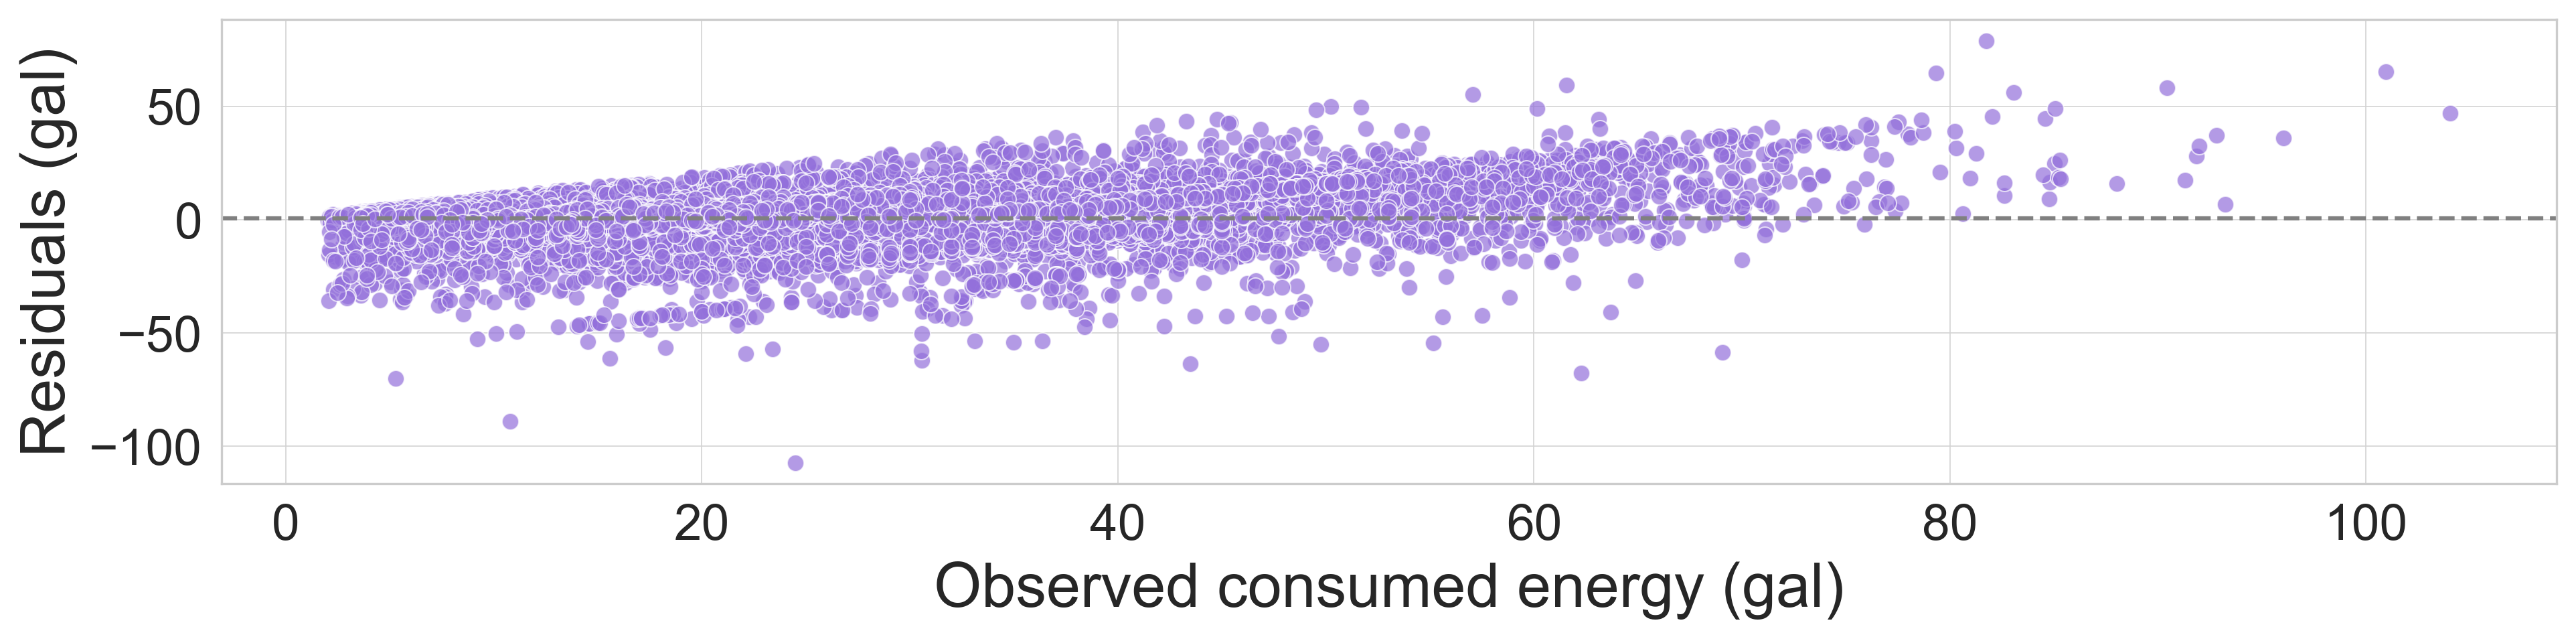

In [187]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='Qty', y='residual', data=df_cdb, color='mediumpurple', alpha=0.7)
plt.axhline(df_cdb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed consumed energy (gal)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

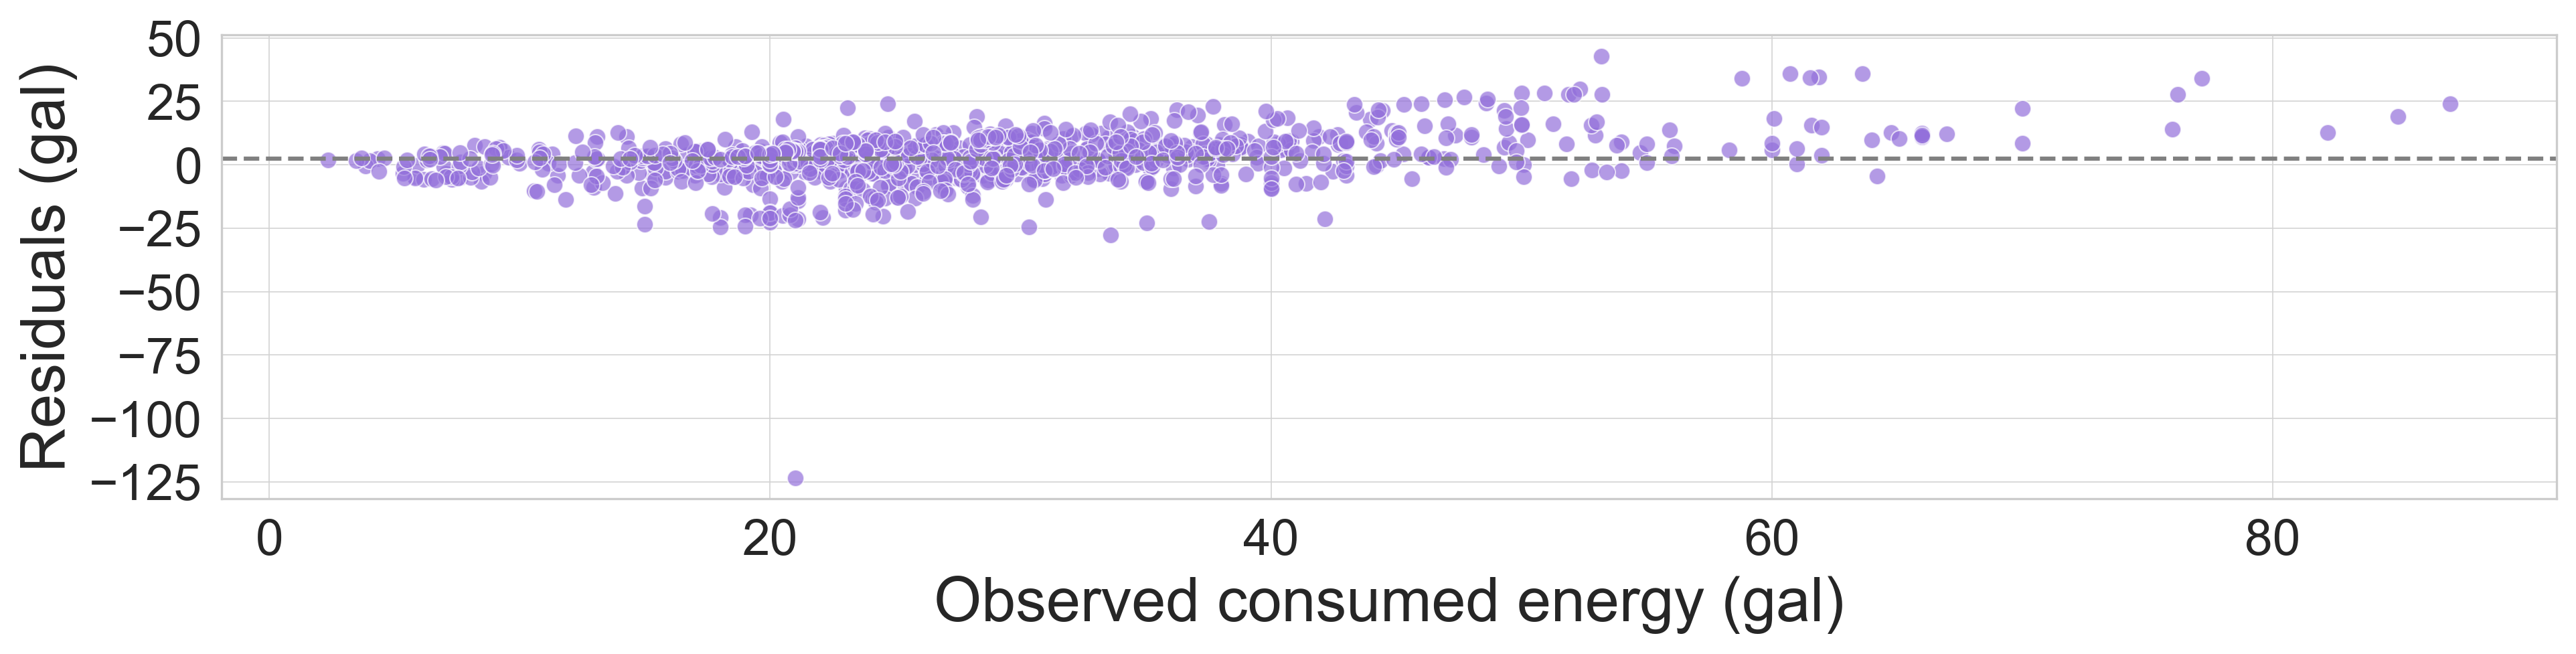

In [188]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='Qty', y='residual', data=df_heb, color='mediumpurple', alpha=0.7)
plt.axhline(df_heb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed consumed energy (gal)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

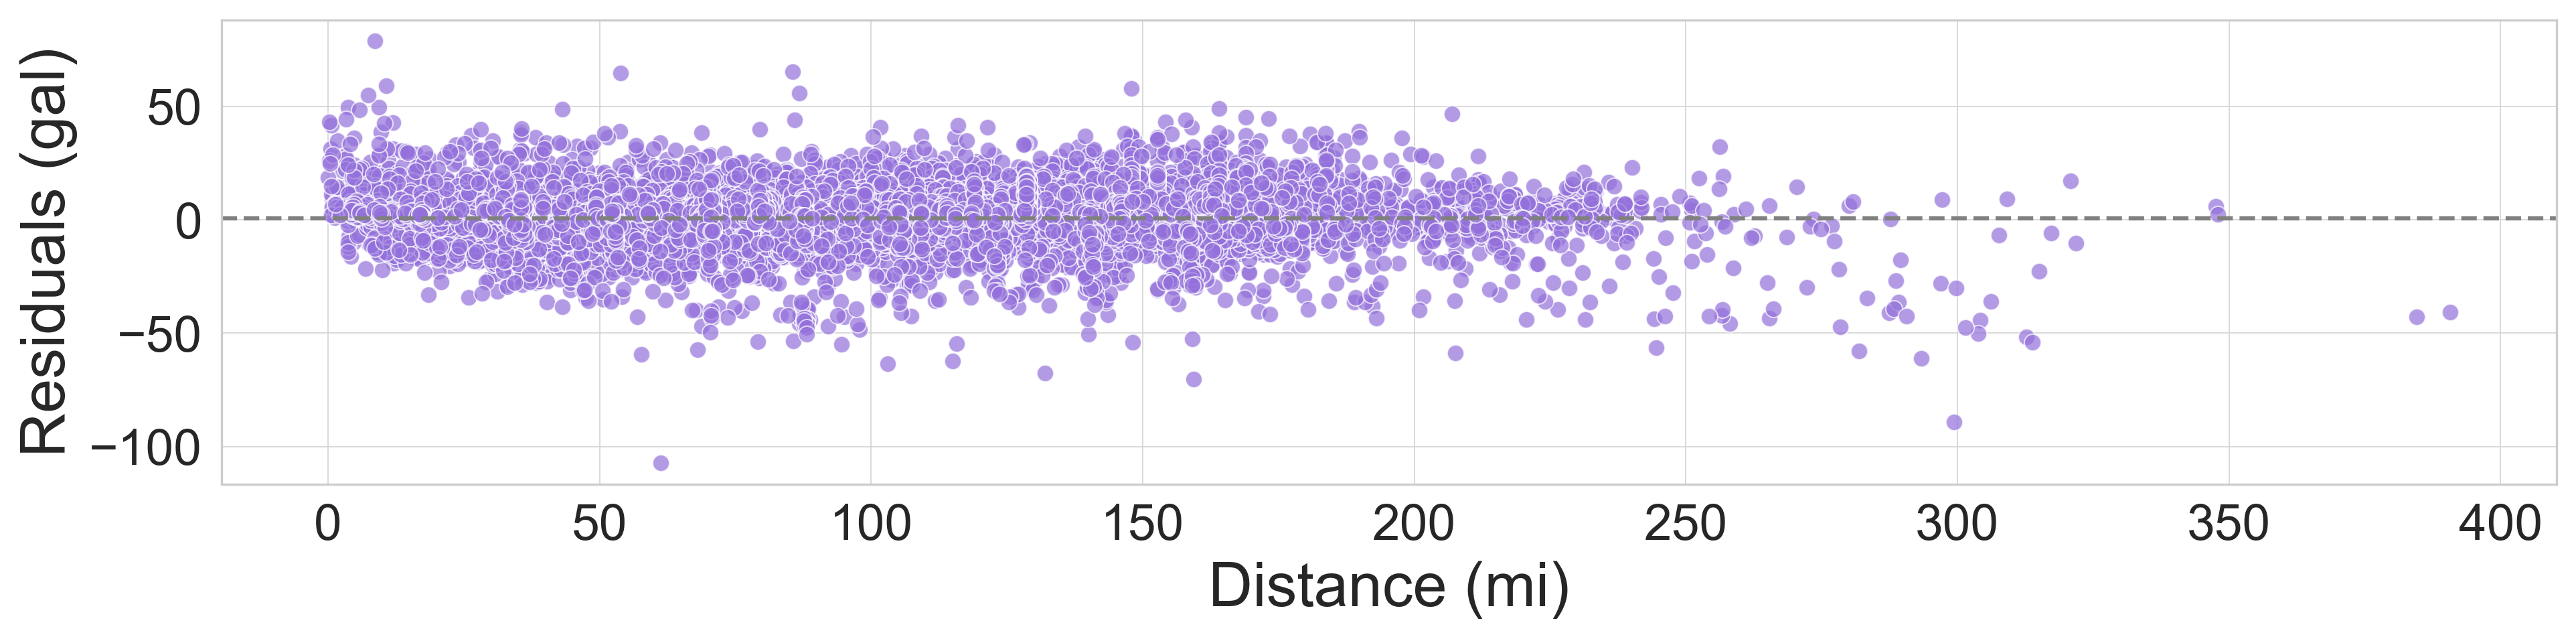

In [189]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='dist', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='dist', y='residual', data=df_cdb, color='mediumpurple', alpha=0.7)
plt.axhline(df_cdb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Distance (mi)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(color='lightgrey', linewidth=0.4)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
#fig.savefig(r'../../figures/residuals-vs-dist-conventional.png', dpi=400, bbox_inches='tight')

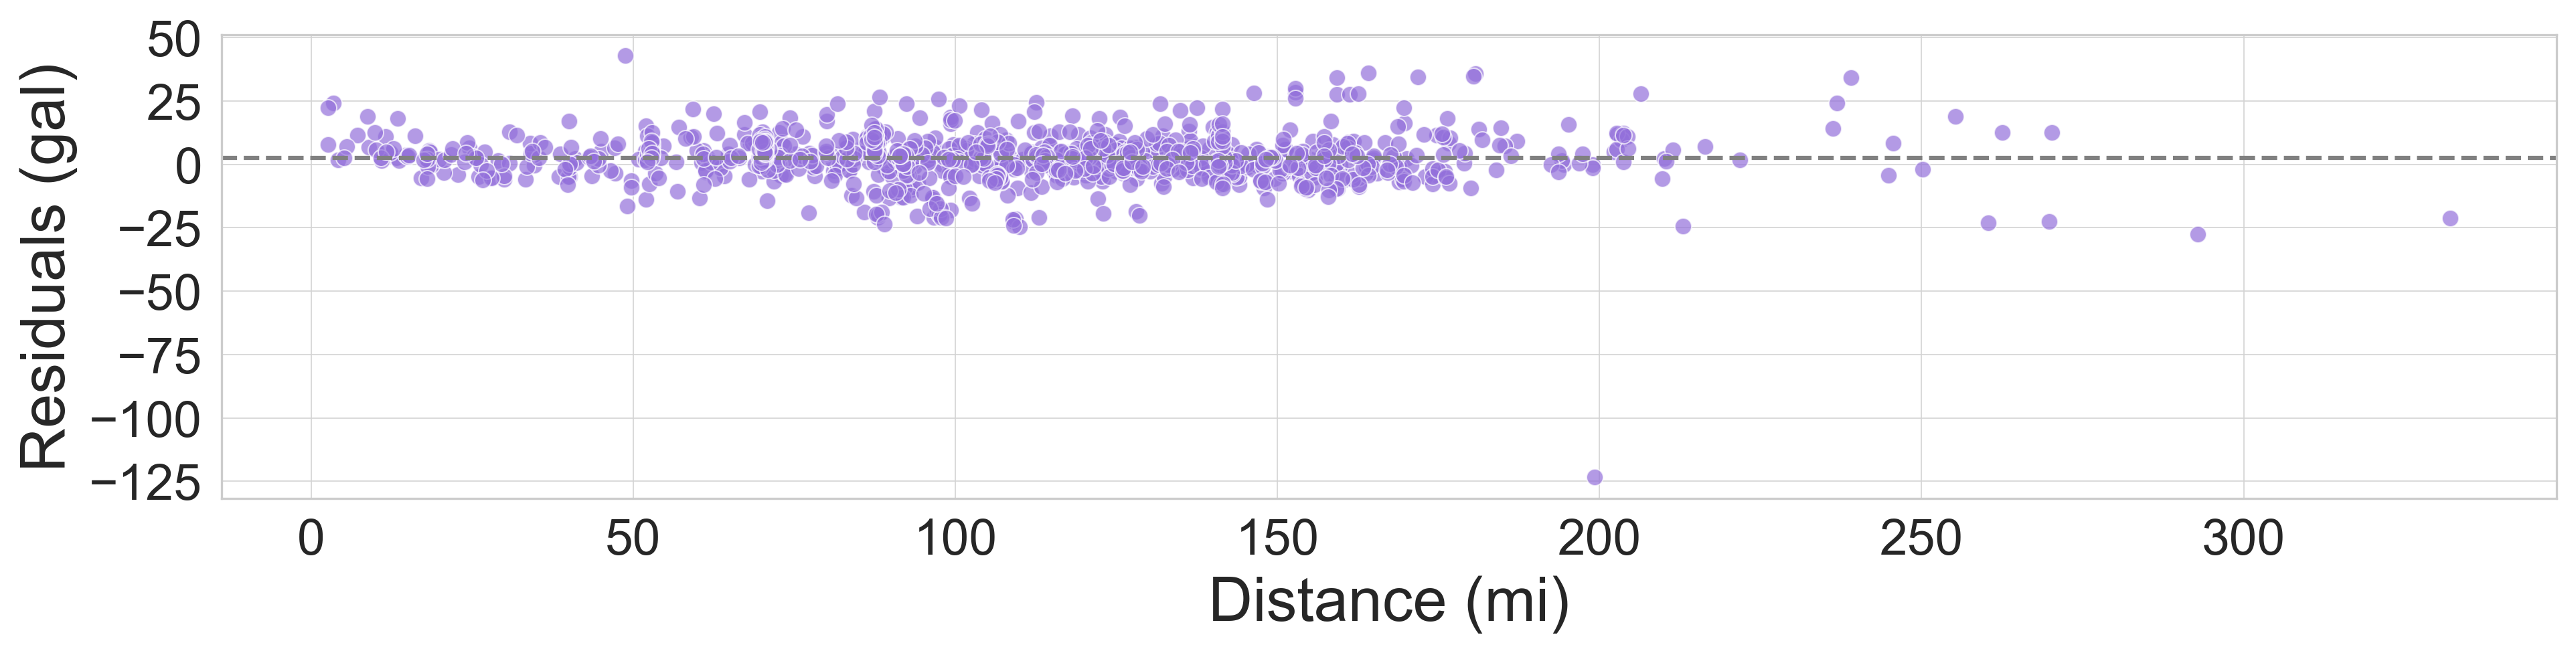

In [190]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='dist', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='dist', y='residual', data=df_heb, color='mediumpurple', alpha=0.7)
plt.axhline(df_heb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Distance (mi)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(color='lightgrey', linewidth=0.4)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
#fig.savefig(r'../../figures/residuals-vs-dist-conventional.png', dpi=400, bbox_inches='tight')fig, ax = plt.subplots(figsize=(15,5), dpi=300)

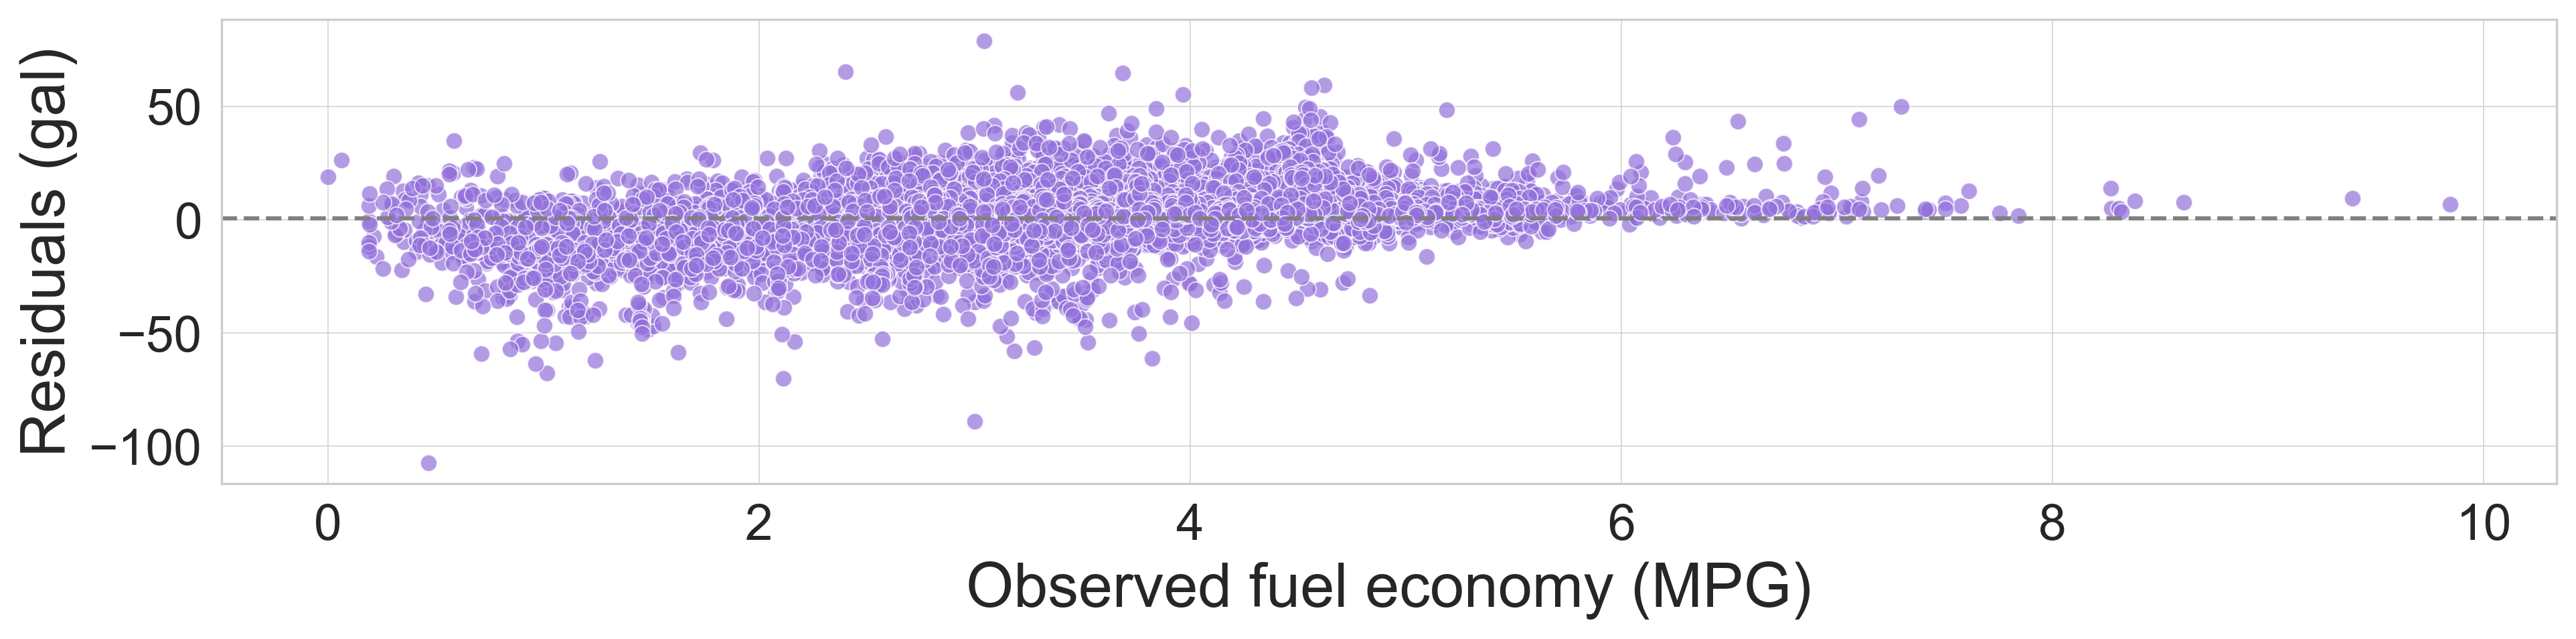

In [191]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='economy', y='residual', data=df_cdb, color='mediumpurple', alpha=0.7)
plt.axhline(df_cdb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed fuel economy (MPG)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

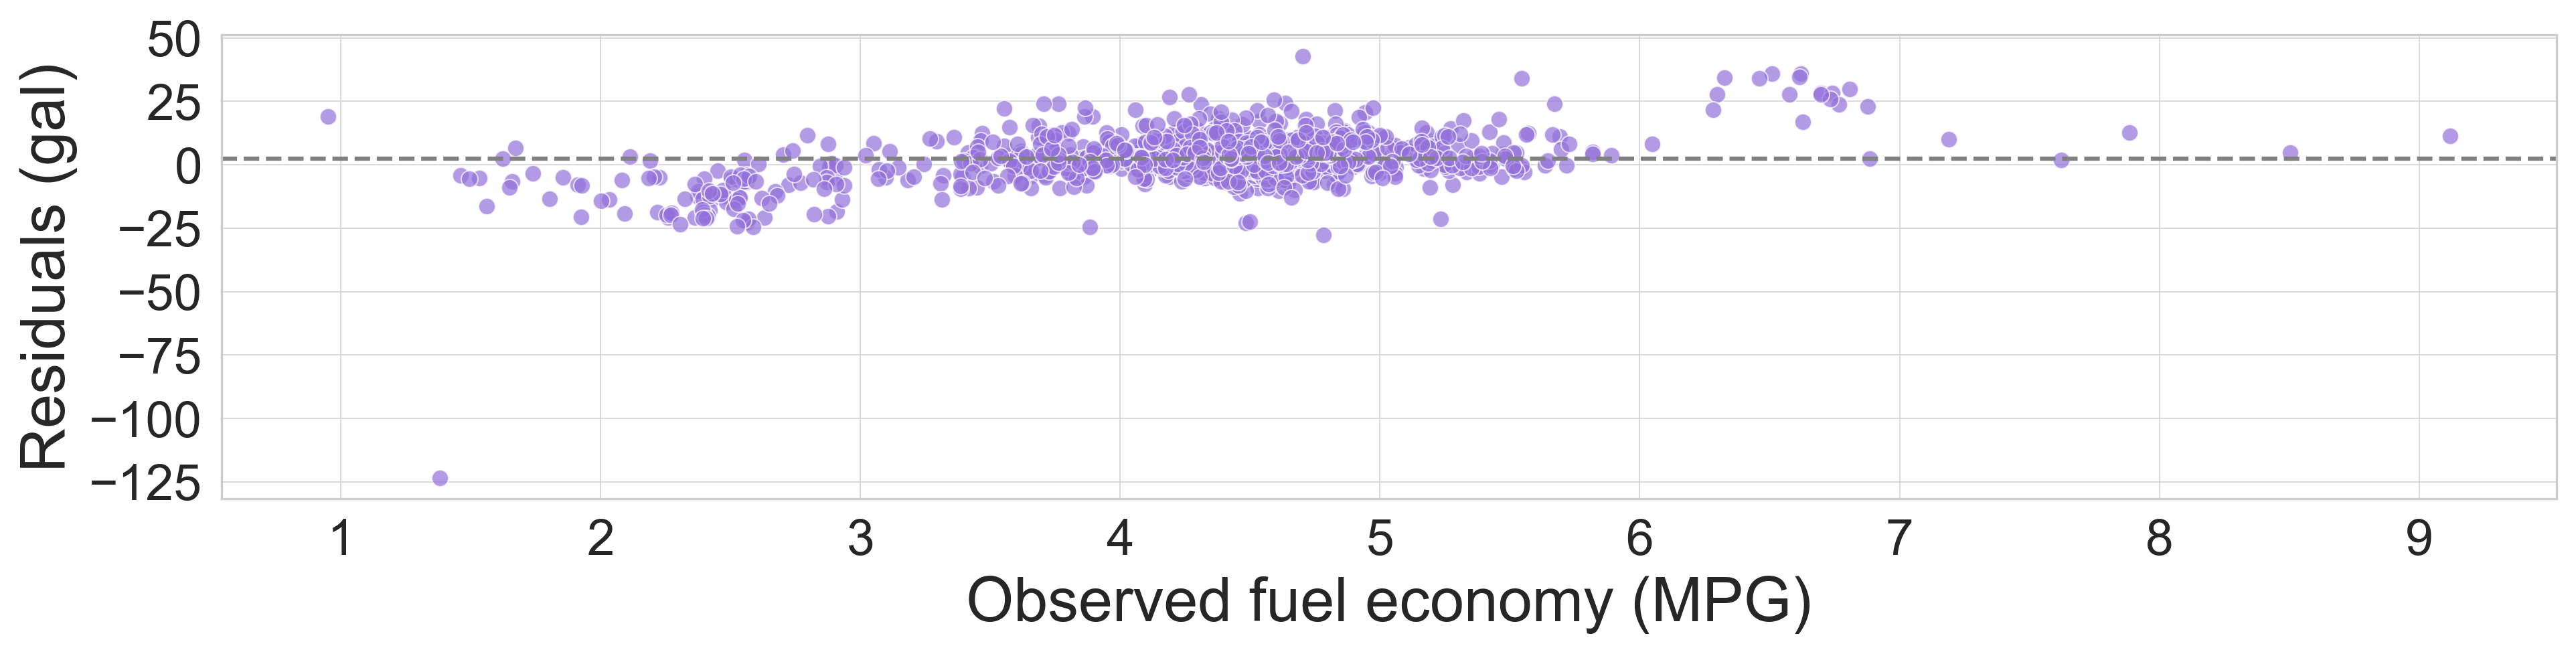

In [192]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='economy', y='residual', data=df_heb, color='mediumpurple', alpha=0.7)
plt.axhline(df_heb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed fuel economy (MPG)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

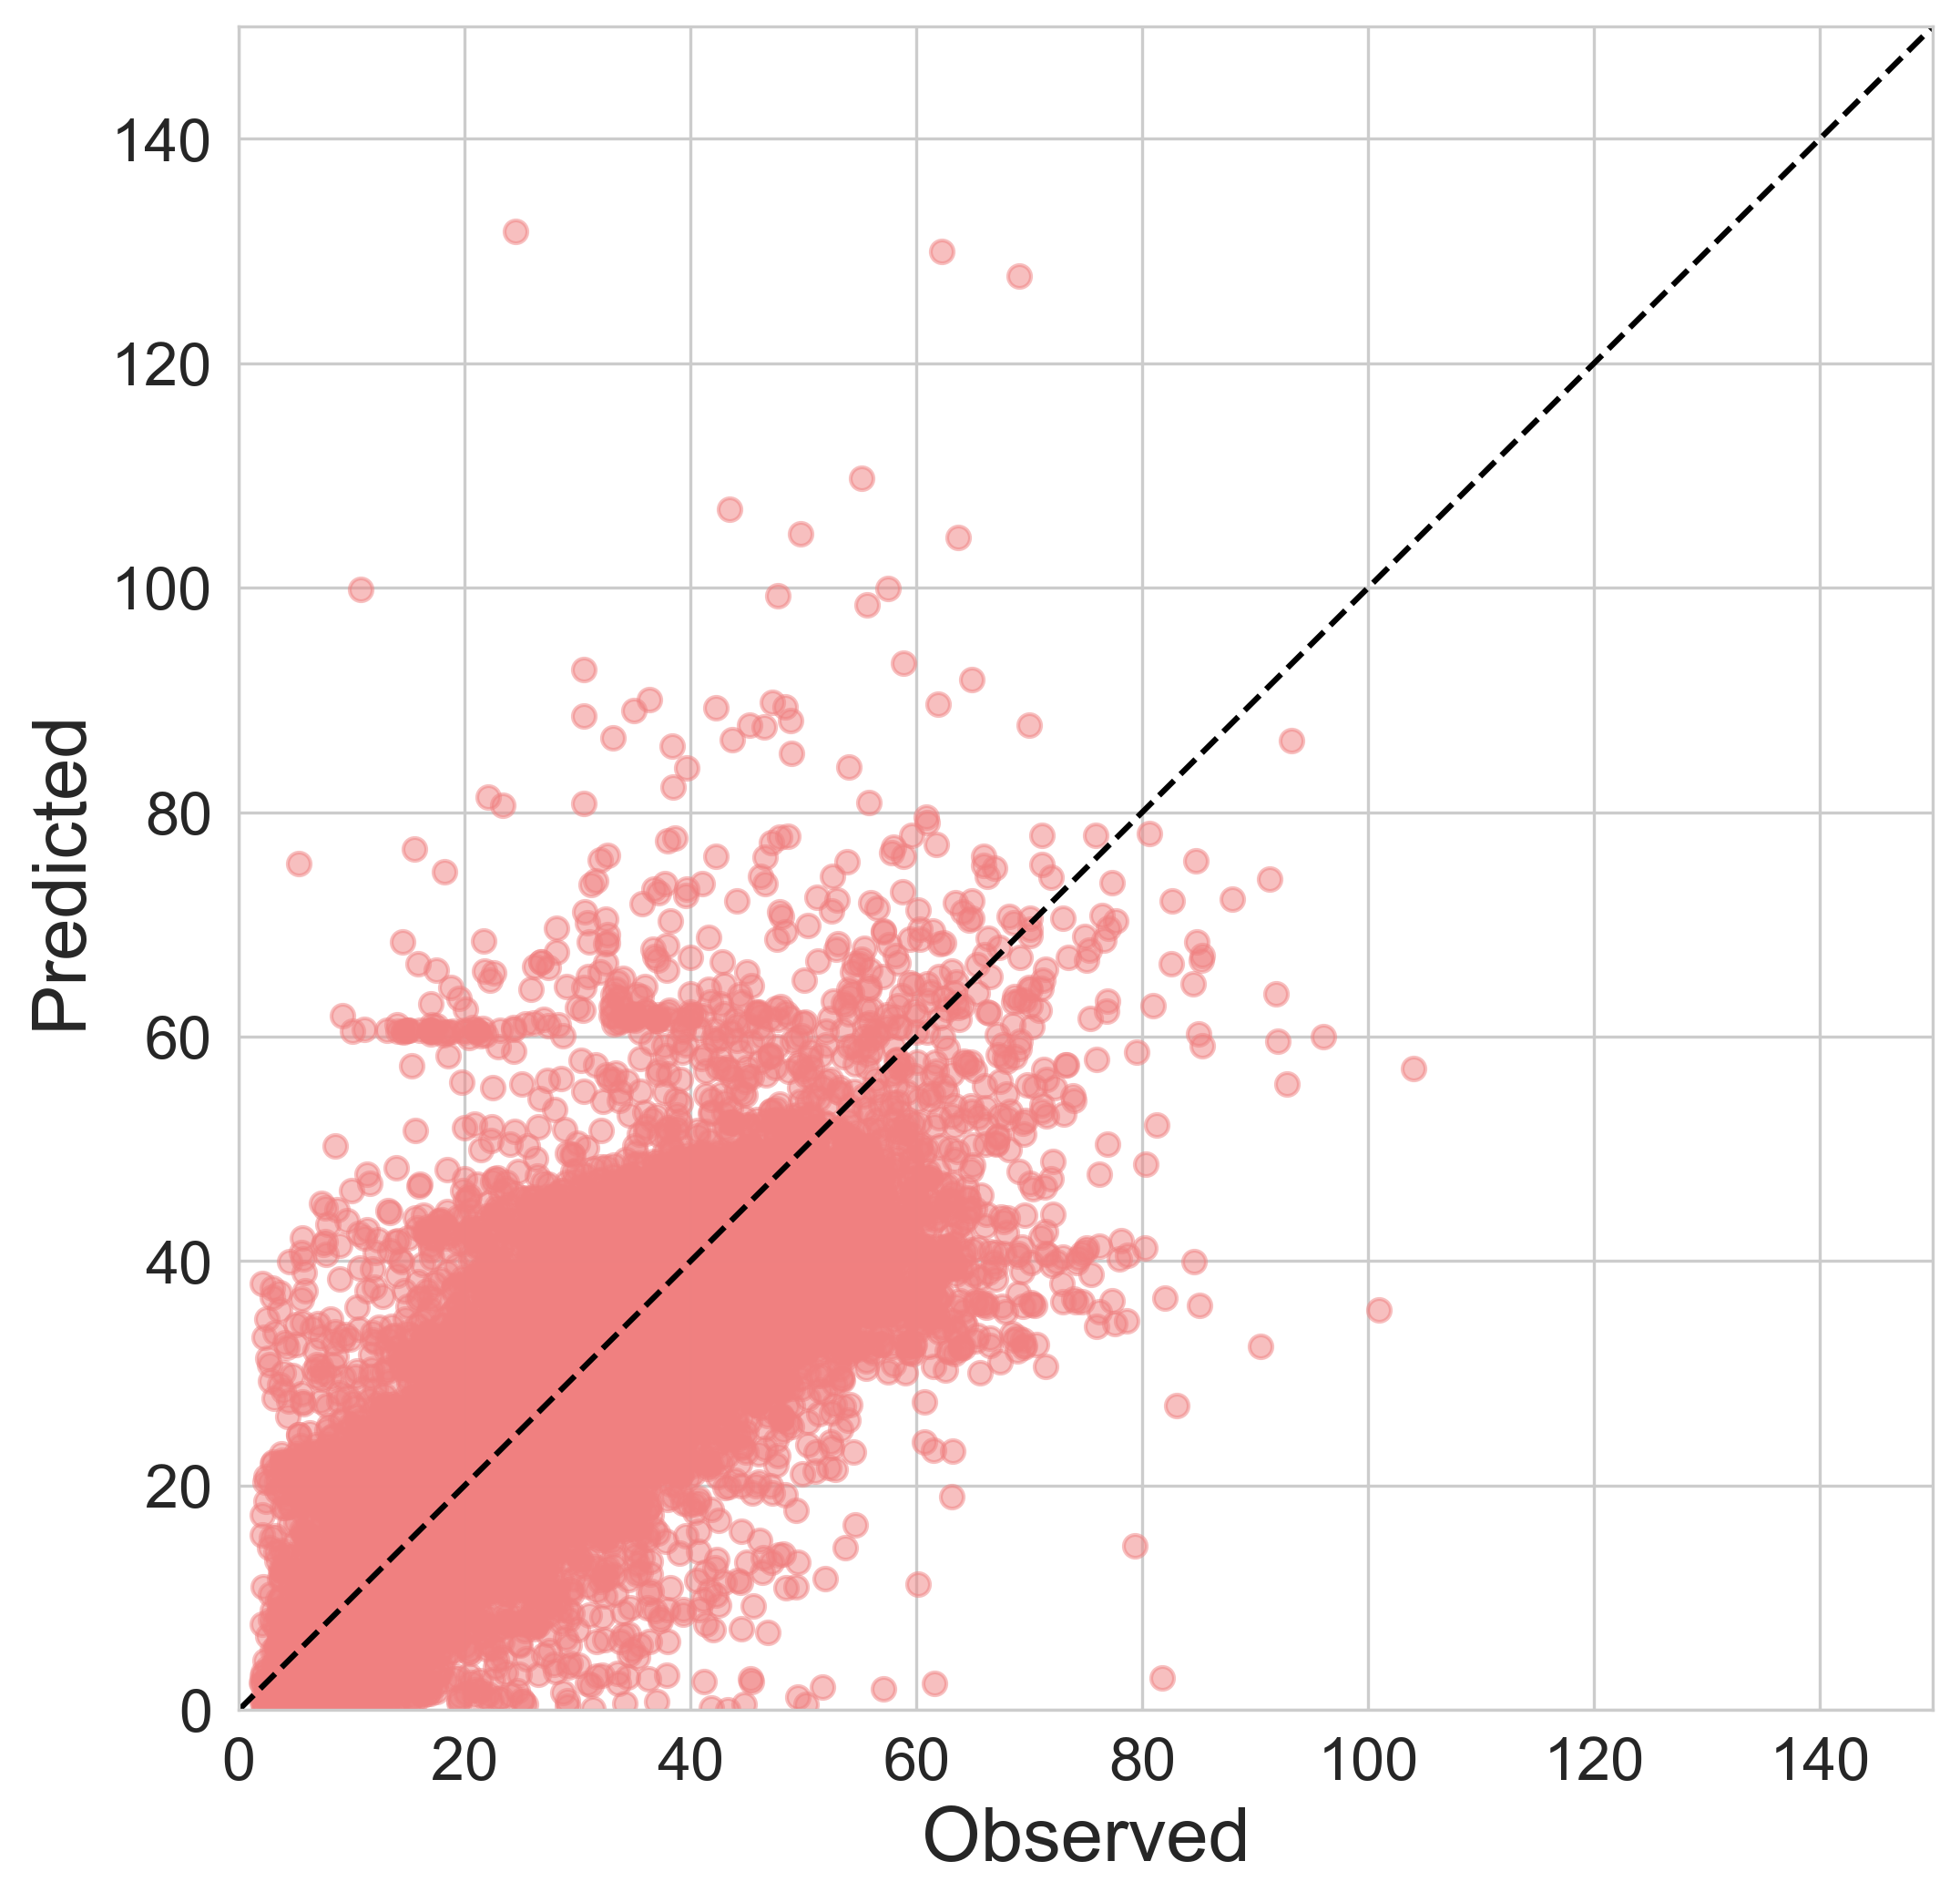

In [193]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(8, 8), dpi=300)

# Filter the DataFrame
filtered_df = df_cdb[(df_cdb['Energy'] >= 0) & (df_cdb['Energy'] <= 150)]

# create a scatter plot of predicted vs observed
plt.scatter(df_cdb['Qty'], df_cdb['Energy'], alpha=0.5, color='lightcoral')

# Calculate the minimum and maximum limits for x and y axes
xlim = ylim = (0, 150)
xy_min = min(xlim[0], ylim[0])
xy_max = max(xlim[1], ylim[1])

# add a reference line showing perfect agreement between predicted and observed values
plt.plot([xy_min, xy_max], [xy_min, xy_max], color='black', linestyle='dashed')

# set the axis limits
plt.xlim(xlim)
plt.ylim(ylim)

# set the axis labels
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Observed', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/CDB-observed-vs-predicted-sep2021-oct2022.png', dpi=300, bbox_inches='tight')

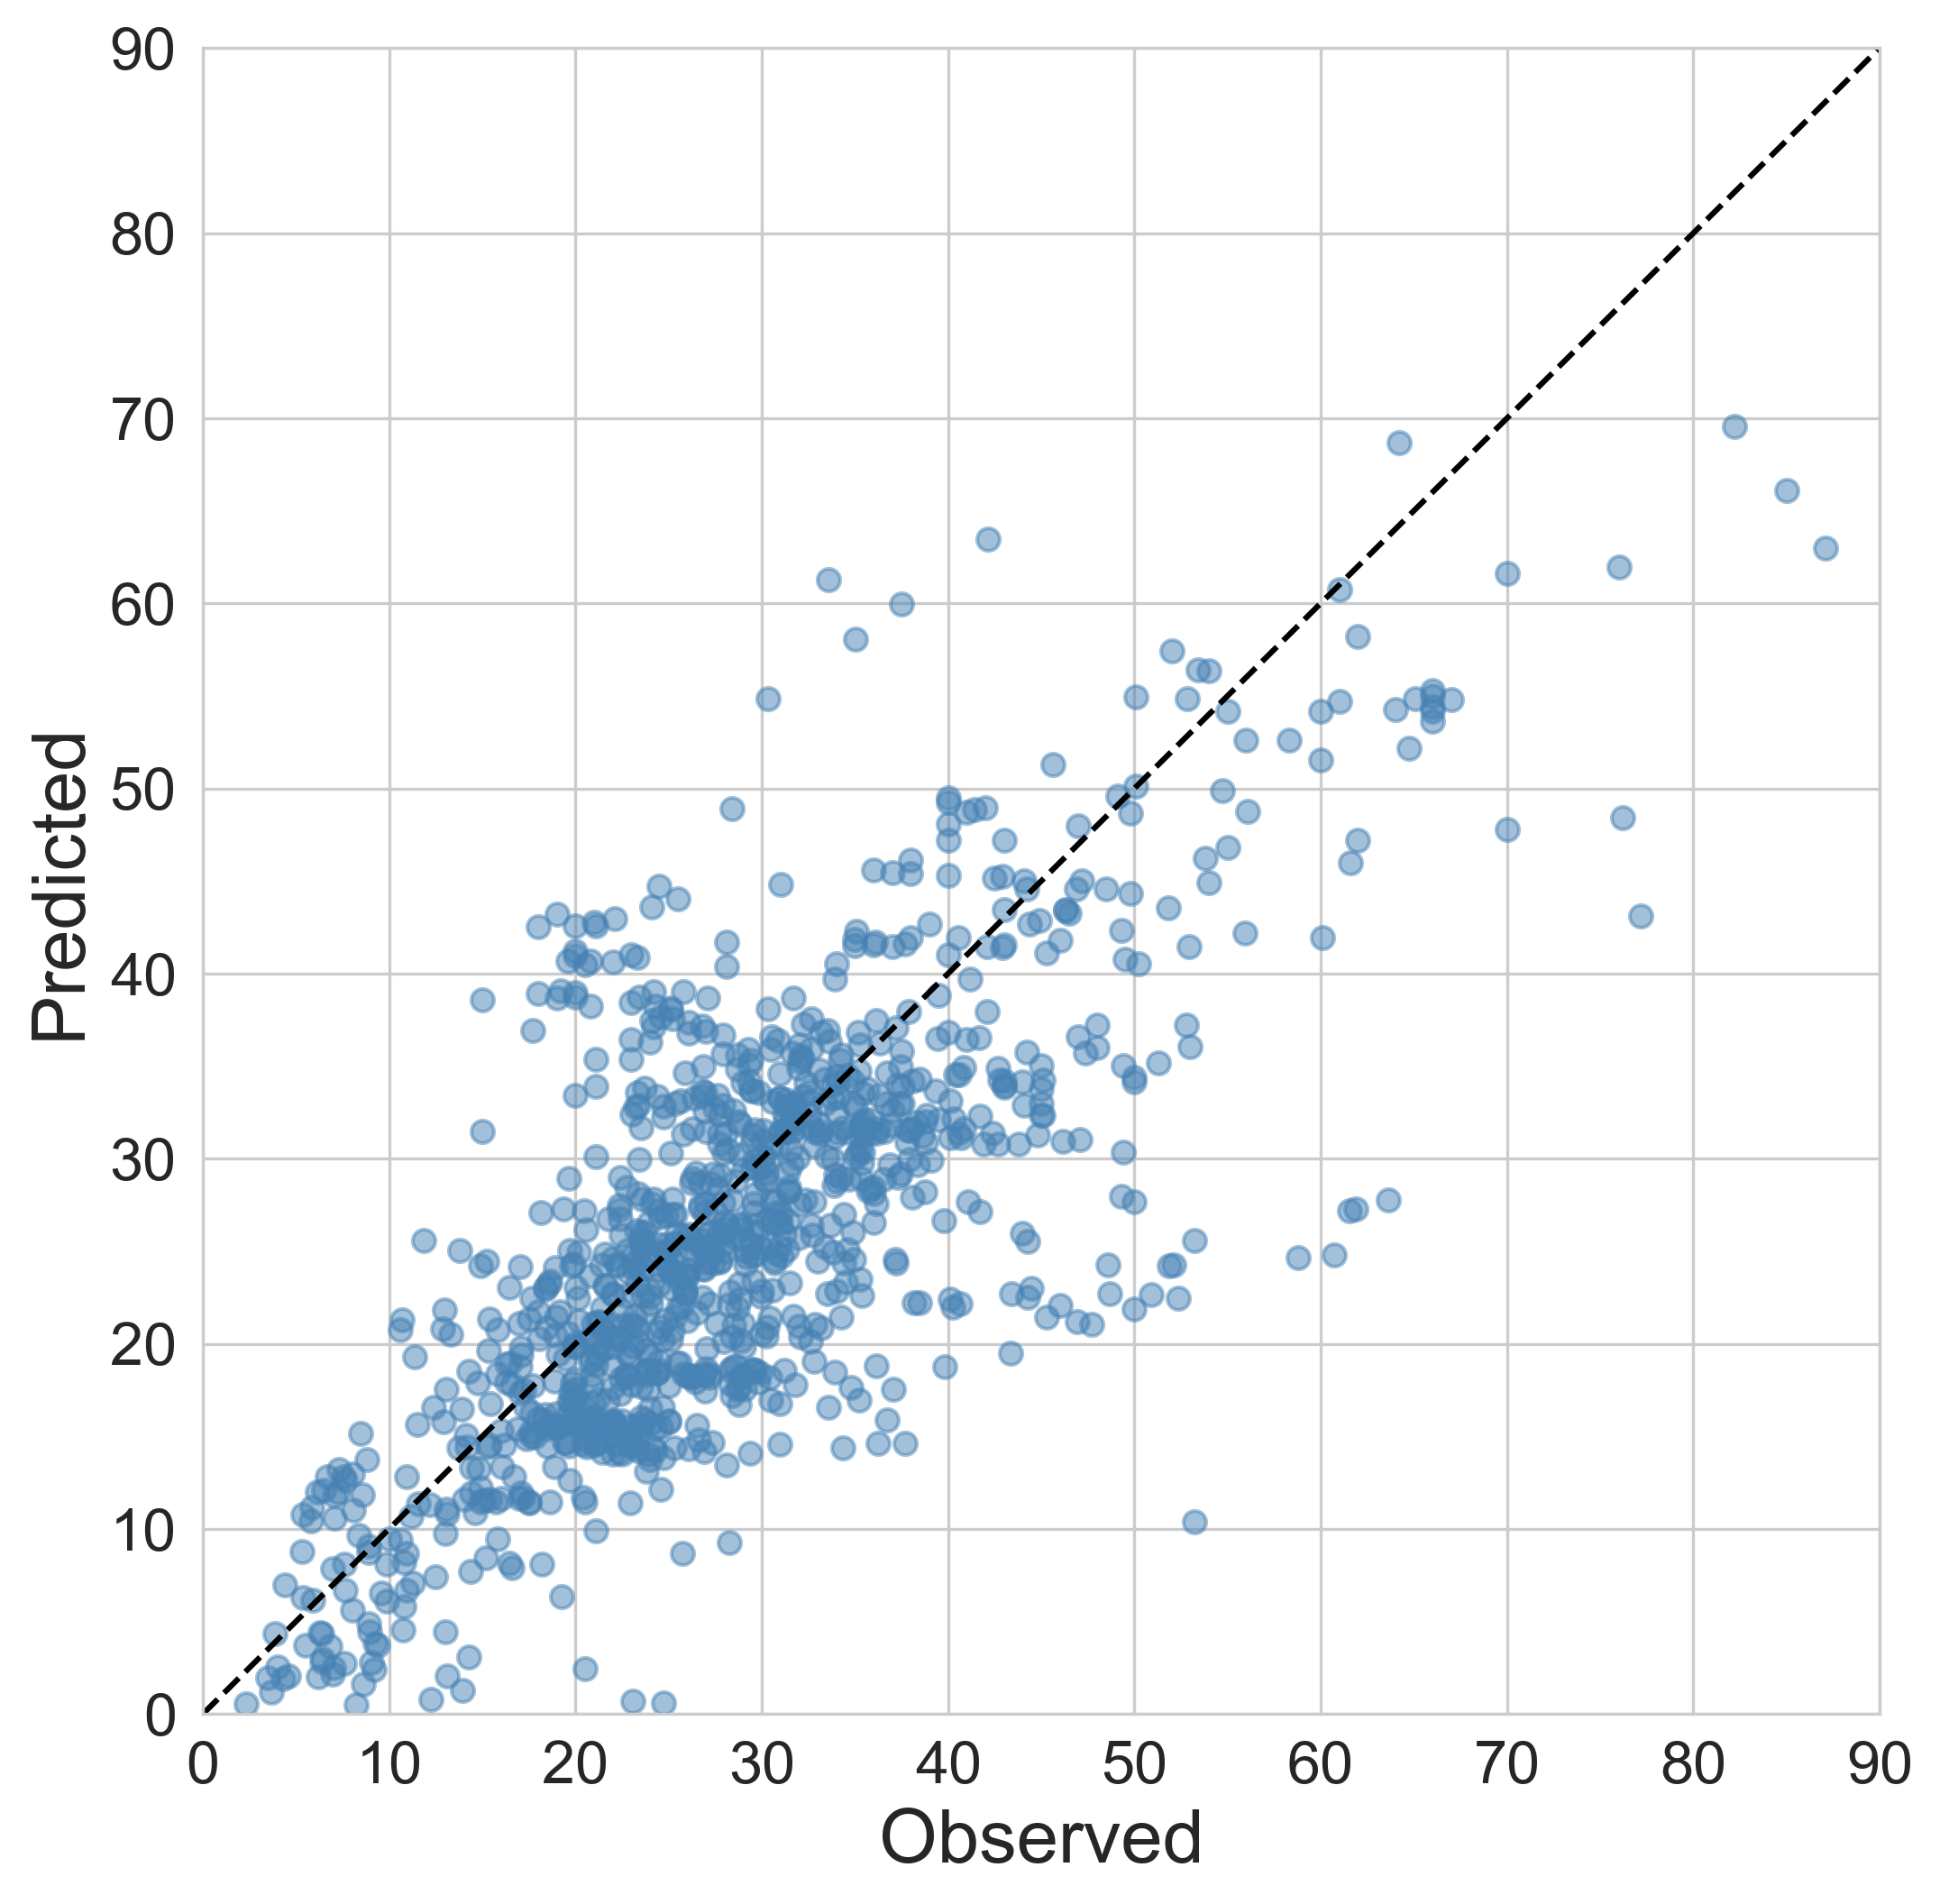

In [194]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(8, 8), dpi=300)

# create a scatter plot of predicted vs observed
plt.scatter(df_heb['Qty'], df_heb['Energy'], alpha=0.5, color='steelblue')

# set the axis limits to 90
xlim = ylim = (0, 90)
plt.xlim(xlim)
plt.ylim(ylim)

# add a reference line showing perfect agreement between predicted and observed values
plt.plot(xlim, ylim, color='black', linestyle='dashed')

# set the axis labels
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Observed', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/HEB-observed-vs-predicted-sep2021-oct2022.png', dpi=300, bbox_inches='tight')

In [195]:
train_df_cdb_vehicle, test_df_cdb_vehicle = train_test_split(df_cdb, test_size=0.2, random_state=42)
train_df_heb_vehicle, test_df_heb_vehicle = train_test_split(df_heb, test_size=0.2, random_state=42)

In [196]:
# Compute MAPE
mape = mean_absolute_percentage_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.27
RMSE: 9.41


In [197]:
top_30_rows = test_df_cdb_vehicle.nlargest(30, 'mape')
top_30_rows

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
22977       23115   3049     7553   2.70  2021-12-13 19:25:00          52496   
2092         2111  23187     1568   2.78  2022-07-09 18:08:00         294002   
26300       26451   3494     7816  10.80  2021-12-20 06:05:00          13495   
11245       11321  20514     1722   4.51  2022-02-02 21:44:00          28826   
4297         4335   6289     1644   2.07  2022-01-06 23:28:00         362389   
4391         4430   6384     1645   3.60  2021-11-17 18:01:00              0   
1783         1801   7497     1567   2.37  2021-12-15 15:22:00         322596   
60             61   4790     1510   3.79  2021-12-31 18:48:00         757861   
21956       22086  28143     1862   7.88  2022-07-28 21:42:00          15529   
16326       16431  14333     1835   2.88  2021-11-17 16:27:00         234473   
3192         3218   8588     1576   5.61  2022-01-19 16:54:00         304813   
20100       20223  26954     1855   5.68  2022-07-21 22:18:00          80274   
18882       19000  18886     1850   3.24  2022-01-14 20:42:00          63833   
15571       15672  13770     1831   8.95  2022-06-10 15:38:00         218806   
4708         4750   6676     1648   5.05  2022-04-06 16:12:00         390411   
4357         4395   6349     1644   4.06  2022-04-04 22:30:00         370040   
19252       19372  19185     1852   5.48  2022-01-28 16:00:00              0   
24458       24602   1300     7801  15.90  2022-01-11 05:34:00         368000   
25594       25742   2207     7813  15.00  2022-03-22 06:06:00         349049   
2636         2659   8190     1573   4.50  2022-01-10 18:33:00         332893   
15844       15947  13947     1833   4.54  2021-12-03 22:09:00         264876   
16338       16443  14345     1835  11.10  2021-11-26 20:46:00         236071   
12854       12939  24358     1811   8.36  2022-08-18 20:45:00         336464   
25031       25177   1762     7811  17.10  2022-03-02 05:54:00         357590   
24652       24796   4075     7801  17.00  2022-09-08 05:02:00         388946   
25199       25346   1870     7812  17.00  2021-10-29 05:50:00         343442   
25976       26125   4379     7814  17.10  2022-09-14 05:05:00         384149   
10697       10771  18728     1720   6.20  2022-03-30 15:46:00          66869   
6857         6913  10388     1662  18.77  2022-01-20 16:00:00         289017   
22127       22258  28270     1863   6.44  2022-09-15 15:35:00          19902   

      Fuel Orfluid Type    Powertrain        dist     Energy         mape  \
22977               DIE  conventional   82.971721  30.748064  1038.817196   
2092                DIE  conventional  103.753411  29.299054   953.922811   
26300               DIE  conventional  299.368932  99.835102   824.399089   
11245               DIE  conventional  101.379091  39.936564   785.511408   
4297                DIE  conventional   47.648163  17.386504   739.927711   
4391                DIE  conventional  107.237904  29.011582   705.877289   
1783                DIE  conventional    4.176966  18.567331   683.431699   
60                  DIE  conventional   12.047577  22.847107   502.826046   
21956               DIE  conventional  143.282971  43.301697   449.513917   
16326               DIE  conventional   53.401336  15.340352   432.651108   
3192                DIE  conventional   52.654604  27.408569   388.566288   
20100               DIE  conventional    6.970690  27.275966   380.210677   
18882               DIE  conventional   25.622638  15.543614   379.741165   
15571               DIE  conventional   28.314002  41.449365   363.121401   
4708                DIE  conventional   24.016549  22.812136   351.725474   
4357                DIE  conventional   13.685186  18.020837   343.862975   
19252               DIE  conventional   32.810330  23.573206   330.167996   
24458               DIE  conventional  140.070130  66.504949   318.270117   
25594               DIE  conventional   88.110276  60.546891   

In [198]:
# Compute MAPE
mape = mean_absolute_percentage_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.24
RMSE: 8.47


In [199]:
top_30_rows = test_df_heb_vehicle.nlargest(30, 'mape')
top_30_rows

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
810          848   2515     7901  18.00  2022-02-11 07:01:00         190838   
983         1024   2665     7902  17.70  2022-02-18 07:11:00         201855   
1048        1091   4156     7902  20.00  2022-09-23 05:23:00         210656   
847          886   2553     7901  19.20  2022-04-08 05:33:00         195631   
707          739  12372     1805   5.39  2022-06-25 22:13:00         300829   
244          256  11988     1803  10.68  2021-10-19 21:53:00              0   
552          575  12271     1804  20.53  2022-06-21 15:59:00         366709   
333          349  12081     1803   6.50  2022-04-14 15:27:00         365794   
30            32  11808     1801   5.79  2021-12-24 18:29:00         346217   
825          864   2531     7901  28.40  2022-03-05 12:19:00         192817   
464          484  12180     1804   9.05  2022-01-13 20:39:00         352300   
243          255  11987     1803   6.94  2021-10-19 15:54:00         353057   
342          358  12090     1803   6.20  2022-05-04 17:34:00              0   
800          838   2505     7901  20.00  2022-01-28 05:44:00         189585   
290          305  12037     1803  28.25  2021-12-17 19:47:00         359955   
445          464  12160     1804  37.69  2021-12-04 19:31:00         349681   
712          746  24292     1805  18.21  2022-08-01 22:00:00         301489   
67            70  11846     1801  50.91  2022-04-01 19:33:00         351290   
679          710  12343     1805   4.60  2022-04-28 15:25:00         296680   
636          666  12299     1805  52.10  2021-11-13 21:58:00         290777   
528          551  12247     1804  48.66  2022-05-04 19:34:00         362991   
775          813   2480     7901  21.10  2021-11-22 14:59:00         186358   
465          485  12181     1804  16.43  2022-01-14 18:23:00         352411   
106          113  11889     1801  18.16  2022-06-09 22:14:00         357798   
618          647  12280     1805  19.62  2021-10-13 22:18:00         287697   
589          615  24259     1804  14.36  2022-08-24 18:33:00         372975   
58            61  11837     1801  27.32  2022-03-21 17:48:00              0   
355          371  12103     1803  40.66  2022-05-18 20:39:00         368816   
917          958   2599     7902  31.00  2021-10-22 05:24:00         194050   
458          477  12173     1804   3.48  2021-12-23 15:43:00         351460   

     Fuel Orfluid Type Powertrain        dist     Energy        mape  \
810                DIE     hybrid   87.917469  38.929691  116.276063   
983                DIE     hybrid   77.217698  36.916648  108.568633   
1048               DIE     hybrid   98.574611  41.195643  105.978213   
847                DIE     hybrid   88.068842  39.063060  103.453439   
707                DIE     hybrid   53.920087  10.765444   99.729938   
244                DIE     hybrid   56.829358  21.268783   99.145909   
552                DIE     hybrid   13.408943   2.457241   88.030974   
333                DIE     hybrid   18.004470  12.063826   85.597319   
30                 DIE     hybrid   43.619864  10.410756   79.805806   
825                DIE     hybrid   94.118331  48.913371   72.230180   
464                DIE     hybrid   12.803184   2.795847   69.106663   
243                DIE     hybrid   18.378543   2.161099   68.860249   
342                DIE     hybrid   11.565284   1.987403   67.945113   
800                DIE     hybrid   60.288024  33.439255   67.196274   
290                DIE     hybrid    8.801329   9.269364   67.188093   
445                DIE     hybrid  100.642500  14.631725   61.178761   
712                DIE     hybrid   58.168329   8.091001   55.568362   
67                 DIE     hybrid  152.776362  22.666204   55.477894   
679                DIE     hybrid   10.787378   2.048444   55.468604   
636                DIE     hybrid  162.561812  24.275553   53.405849   
528                DIE     hybrid  152.77636

## Weekly system level performance

In [200]:
df_heb['ServiceDateTime'] = pd.to_datetime(df_heb['ServiceDateTime'])
df_heb = df_heb.set_index('ServiceDateTime')
weekly_energy_heb = df_heb[['Energy','Qty']].resample('W').sum()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32708\3935629555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['ServiceDateTime'] = pd.to_datetime(df_heb['ServiceDateTime'])


In [201]:
weekly_energy_heb=weekly_energy_heb.reset_index()
weekly_energy_heb

ServiceDateTime       Energy      Qty
0       2021-10-03    60.625930    71.03
1       2021-10-10   475.397453   478.15
2       2021-10-17   716.921823   739.43
3       2021-10-24   808.753142   841.32
4       2021-10-31   862.229884   924.62
5       2021-11-07   576.973222   596.40
6       2021-11-14   761.910282   748.49
7       2021-11-21   571.016309   579.73
8       2021-11-28   580.678747   648.20
9       2021-12-05   580.894164   594.13
10      2021-12-12   725.811975   755.72
11      2021-12-19   623.082379   745.80
12      2021-12-26   365.516797   399.42
13      2022-01-02   313.671833   305.22
14      2022-01-09   199.789856   203.26
15      2022-01-16    87.273643   111.59
16      2022-01-23   165.776284   184.46
17      2022-01-30   434.912710   509.37
18      2022-02-06   361.908059   393.79
19      2022-02-13   522.813603   518.82
20      2022-02-20   587.258035   577.47
21      2022-02-27   450.034069   501.63
22      2022-03-06   541.017489   495.39
23      2022-03-13   354.613581   365.20
24      2022-03-20   216.877216   203.72
25      2022-03-27   604.046773   692.32
26      2022-04-03   757.040059   817.62
27      2022-04-10   876.318960   874.35
28      2022-04-17   932.181988  1007.60
29      2022-04-24   870.154417   848.23
30      2022-05-01   770.125657   805.41
31      2022-05-08  1102.591354  1107.85
32      2022-05-15   862.841665   976.38
33      2022-05-22   532.558561   658.71
34      2022-05-29   707.633824   837.74
35      2022-06-05   472.211169   627.95
36      2022-06-12   288.922462   333.47
37      2022-06-19   277.417455   330.68
38      2022-06-26   426.171699   558.09
39      2022-07-03   586.674677   564.35
40      2022-07-10   298.747792   361.91
41      2022-07-17   300.702367   347.03
42      2022-07-24   447.223667   546.27
43      2022-07-31   332.278038   381.46
44      2022-08-07   385.768674   476.25
45      2022-08-14   344.008235   417.27
46      2022-08-21   187.758570   206.36
47      2022-08-28   217.075727   259.63
48      2022-09-04   400.134382   524.14
49      2022-09-11   584.962636   755.83
50      2022-09-18   711.385046   878.80
51      2022-09-25   919.275430  1011.51
52      2022-10-02   401.104250   459.56

In [202]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
train_df_heb_system, test_df_heb_system = train_test_split(weekly_energy_heb, test_size=0.2, random_state=42)

In [203]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_heb_system['Qty'], test_df_heb_system['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.10
RMSE: 71.04


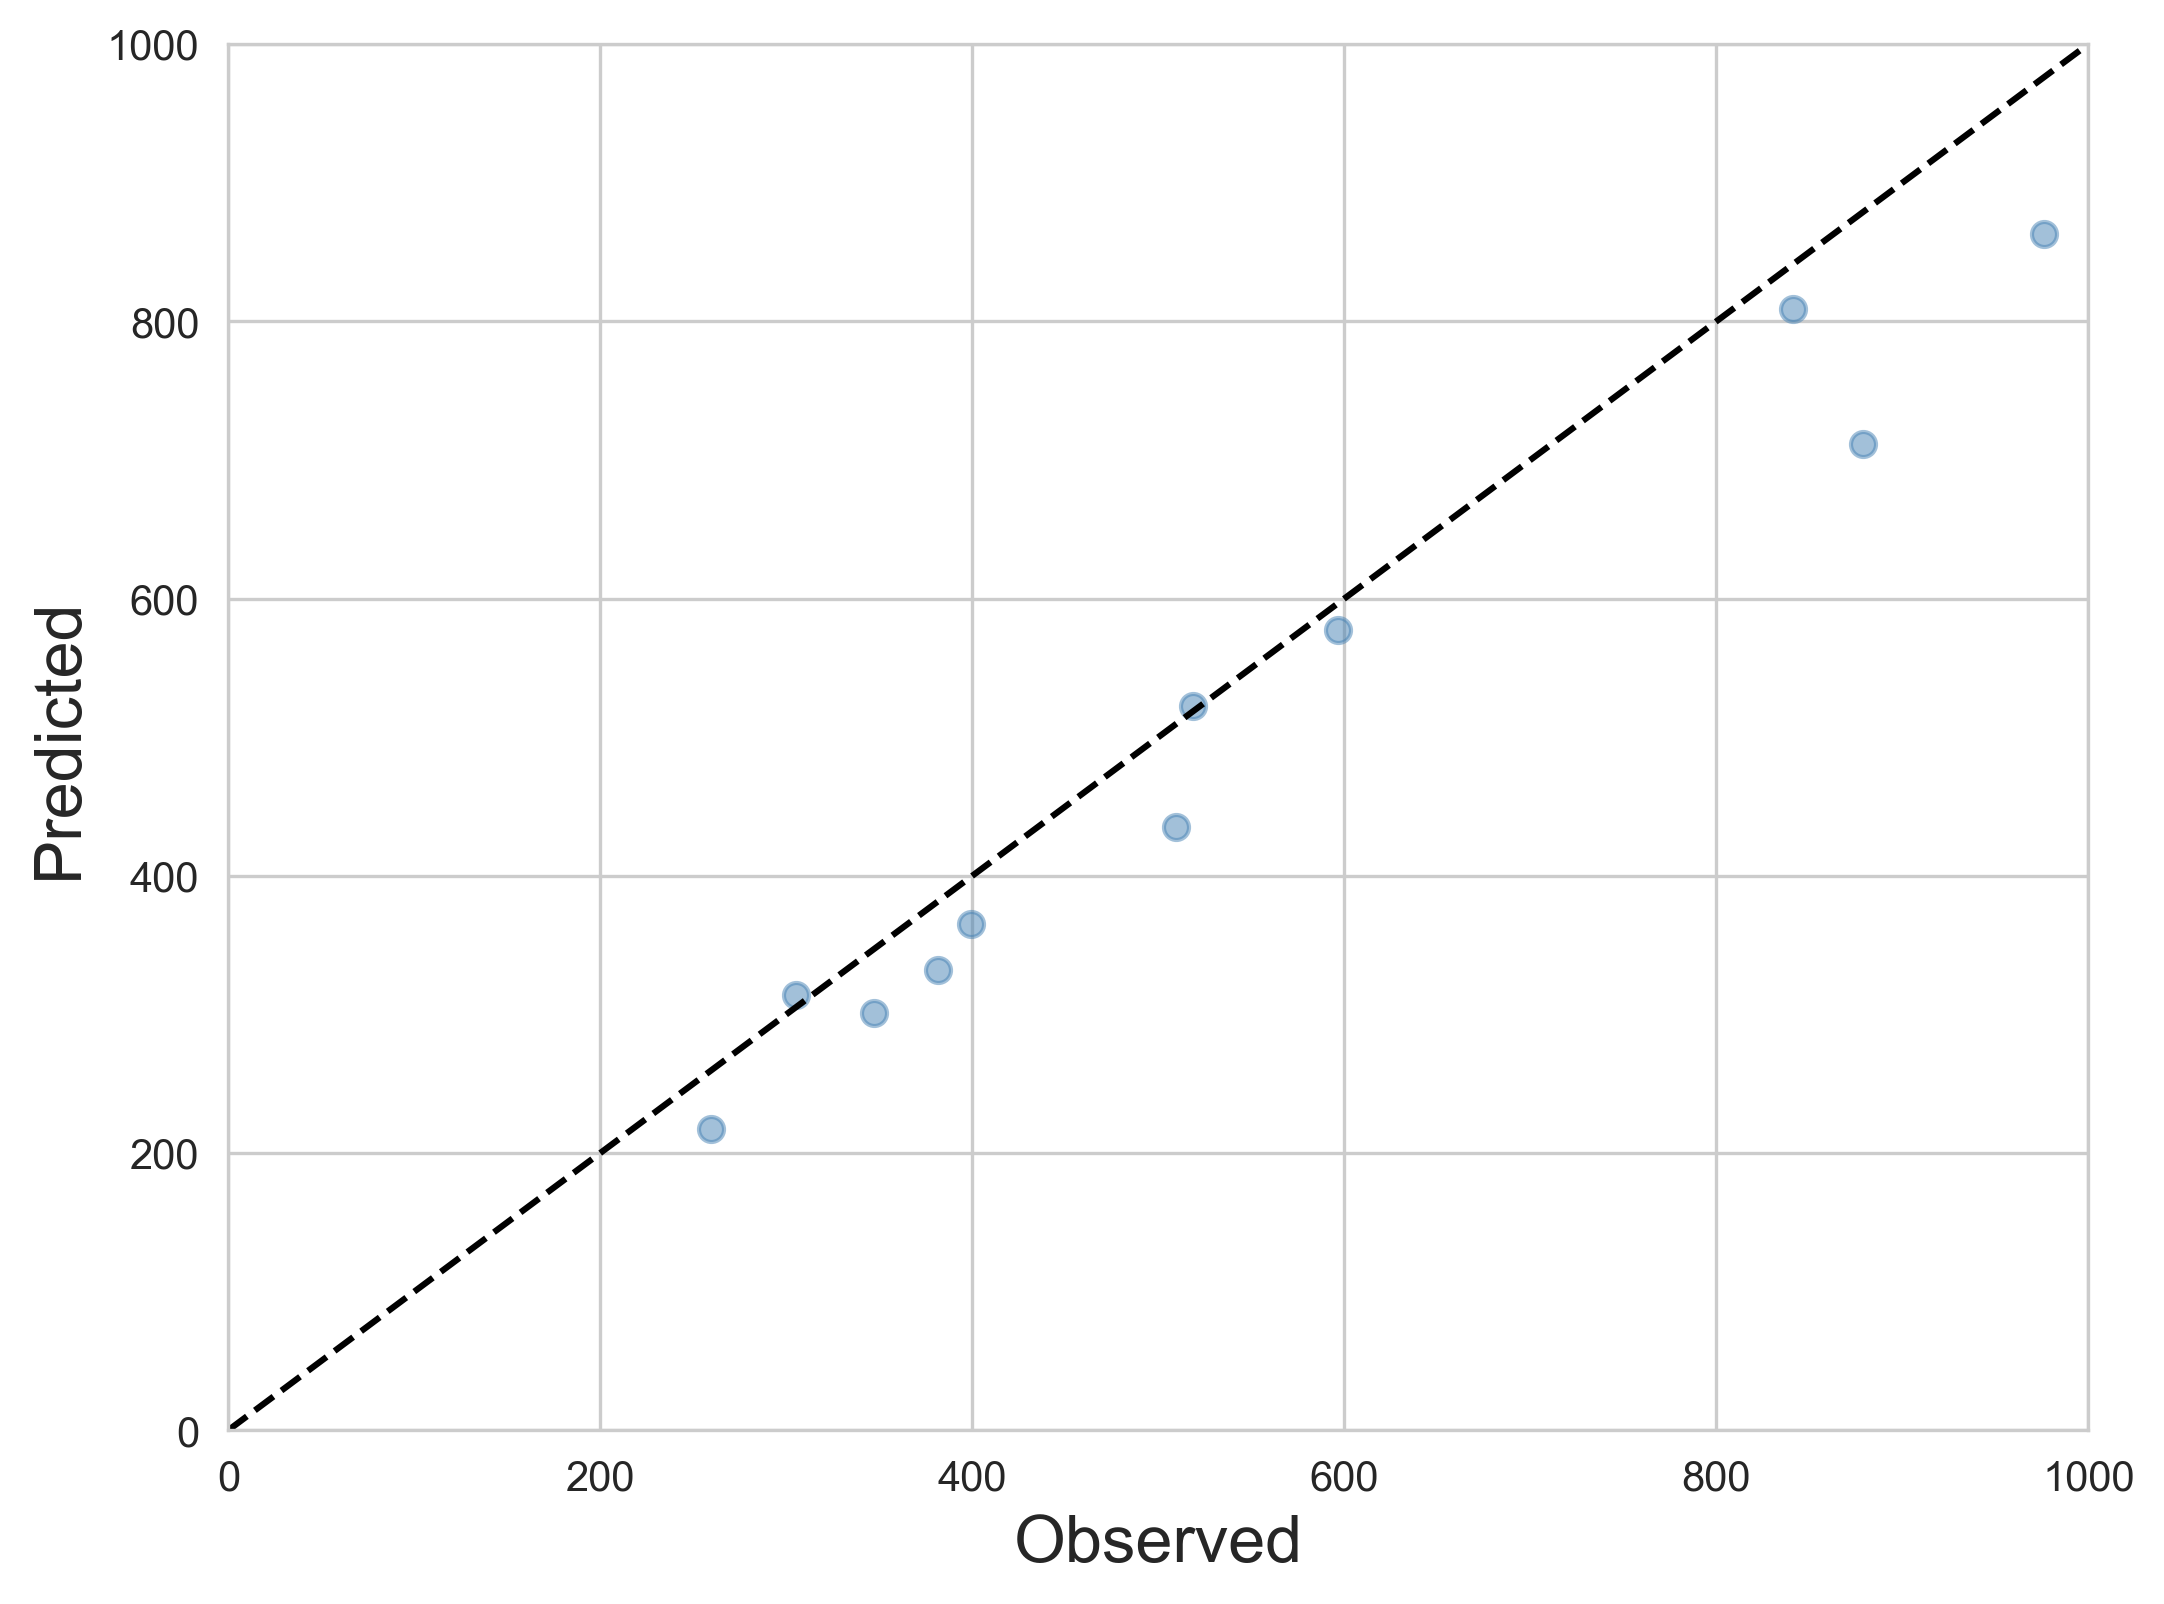

In [204]:

# create a new figure with specified size and DPI
fig = plt.figure(figsize=(8, 6), dpi=300)

# create a scatter plot of predicted vs observed
plt.scatter(test_df_heb_system['Qty'], test_df_heb_system['Energy'], alpha=0.5, color='steelblue')

# set the axis limits to 90
xlim = ylim = (0, 1000)
plt.xlim(xlim)
plt.ylim(ylim)

# add a reference line showing perfect agreement between predicted and observed values
plt.plot(xlim, ylim, color='black', linestyle='dashed')

# set the axis labels
plt.xlabel('Observed', fontsize=16)
plt.ylabel('Predicted',  fontsize=16)

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/HEB-observed-vs-predicted-system-sep2021-oct2022.png', dpi=300, bbox_inches='tight')

In [205]:
df_cdb['ServiceDateTime'] = pd.to_datetime(df_cdb['ServiceDateTime'])
df_cdb = df_cdb.set_index('ServiceDateTime')
weekly_energy_cdb = df_cdb[['Energy','Qty']].resample('W').sum()

In [206]:
weekly_energy_cdb=weekly_energy_cdb.reset_index()
weekly_energy_cdb

ServiceDateTime        Energy       Qty
0       2021-10-03   2276.754233   2449.28
1       2021-10-10  16954.106006  17555.21
2       2021-10-17  14439.099453  15279.28
3       2021-10-24  16938.838582  17622.50
4       2021-10-31  16460.436619  16239.71
5       2021-11-07  16527.919633  16516.53
6       2021-11-14  14375.824886  14105.33
7       2021-11-21  16536.017474  16290.01
8       2021-11-28  13006.048841  13273.81
9       2021-12-05  16222.555100  16254.19
10      2021-12-12  16004.468087  16116.70
11      2021-12-19  15348.991829  15114.47
12      2021-12-26  12521.971934  12469.21
13      2022-01-02  12305.512661  12407.47
14      2022-01-09  14421.769822  14147.60
15      2022-01-16  14373.816954  13869.56
16      2022-01-23  12826.116799  11901.35
17      2022-01-30  15577.387824  15415.37
18      2022-02-06  15336.430271  15138.76
19      2022-02-13  15905.817328  15477.94
20      2022-02-20  15361.316030  15679.65
21      2022-02-27  14532.552510  14797.93
22      2022-03-06  15955.212783  16145.83
23      2022-03-13  16244.833088  16229.55
24      2022-03-20  15735.192294  16040.59
25      2022-03-27  15886.966059  15737.35
26      2022-04-03  15859.067377  15630.52
27      2022-04-10  15827.600332  15313.01
28      2022-04-17  15106.260747  15337.56
29      2022-04-24  13623.604061  13996.97
30      2022-05-01  15968.238014  15665.34
31      2022-05-08  15456.271996  14728.35
32      2022-05-15  15793.035445  16044.73
33      2022-05-22  14510.039442  15715.56
34      2022-05-29  15206.900374  15658.26
35      2022-06-05  13631.488551  14107.89
36      2022-06-12  15714.887199  16357.95
37      2022-06-19  15749.139986  16296.81
38      2022-06-26  14373.065109  14943.96
39      2022-07-03  13923.577554  12834.72
40      2022-07-10  12991.382954  14226.98
41      2022-07-17  14656.691840  16202.55
42      2022-07-24  13899.421479  15557.41
43      2022-07-31  14240.654123  15454.21
44      2022-08-07  14600.711929  15898.09
45      2022-08-14  14397.772960  15740.95
46      2022-08-21  14477.211910  15245.71
47      2022-08-28  14503.679895  15427.65
48      2022-09-04  15562.860570  16548.83
49      2022-09-11  13685.196152  14245.24
50      2022-09-18  16047.875406  16592.70
51      2022-09-25  15671.385650  15842.24
52      2022-10-02  10849.062950  10683.43

In [207]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
train_df_cdb_system, test_df_cdb_system = train_test_split(weekly_energy_cdb, test_size=0.2, random_state=42)

In [208]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.03
RMSE: 724.02


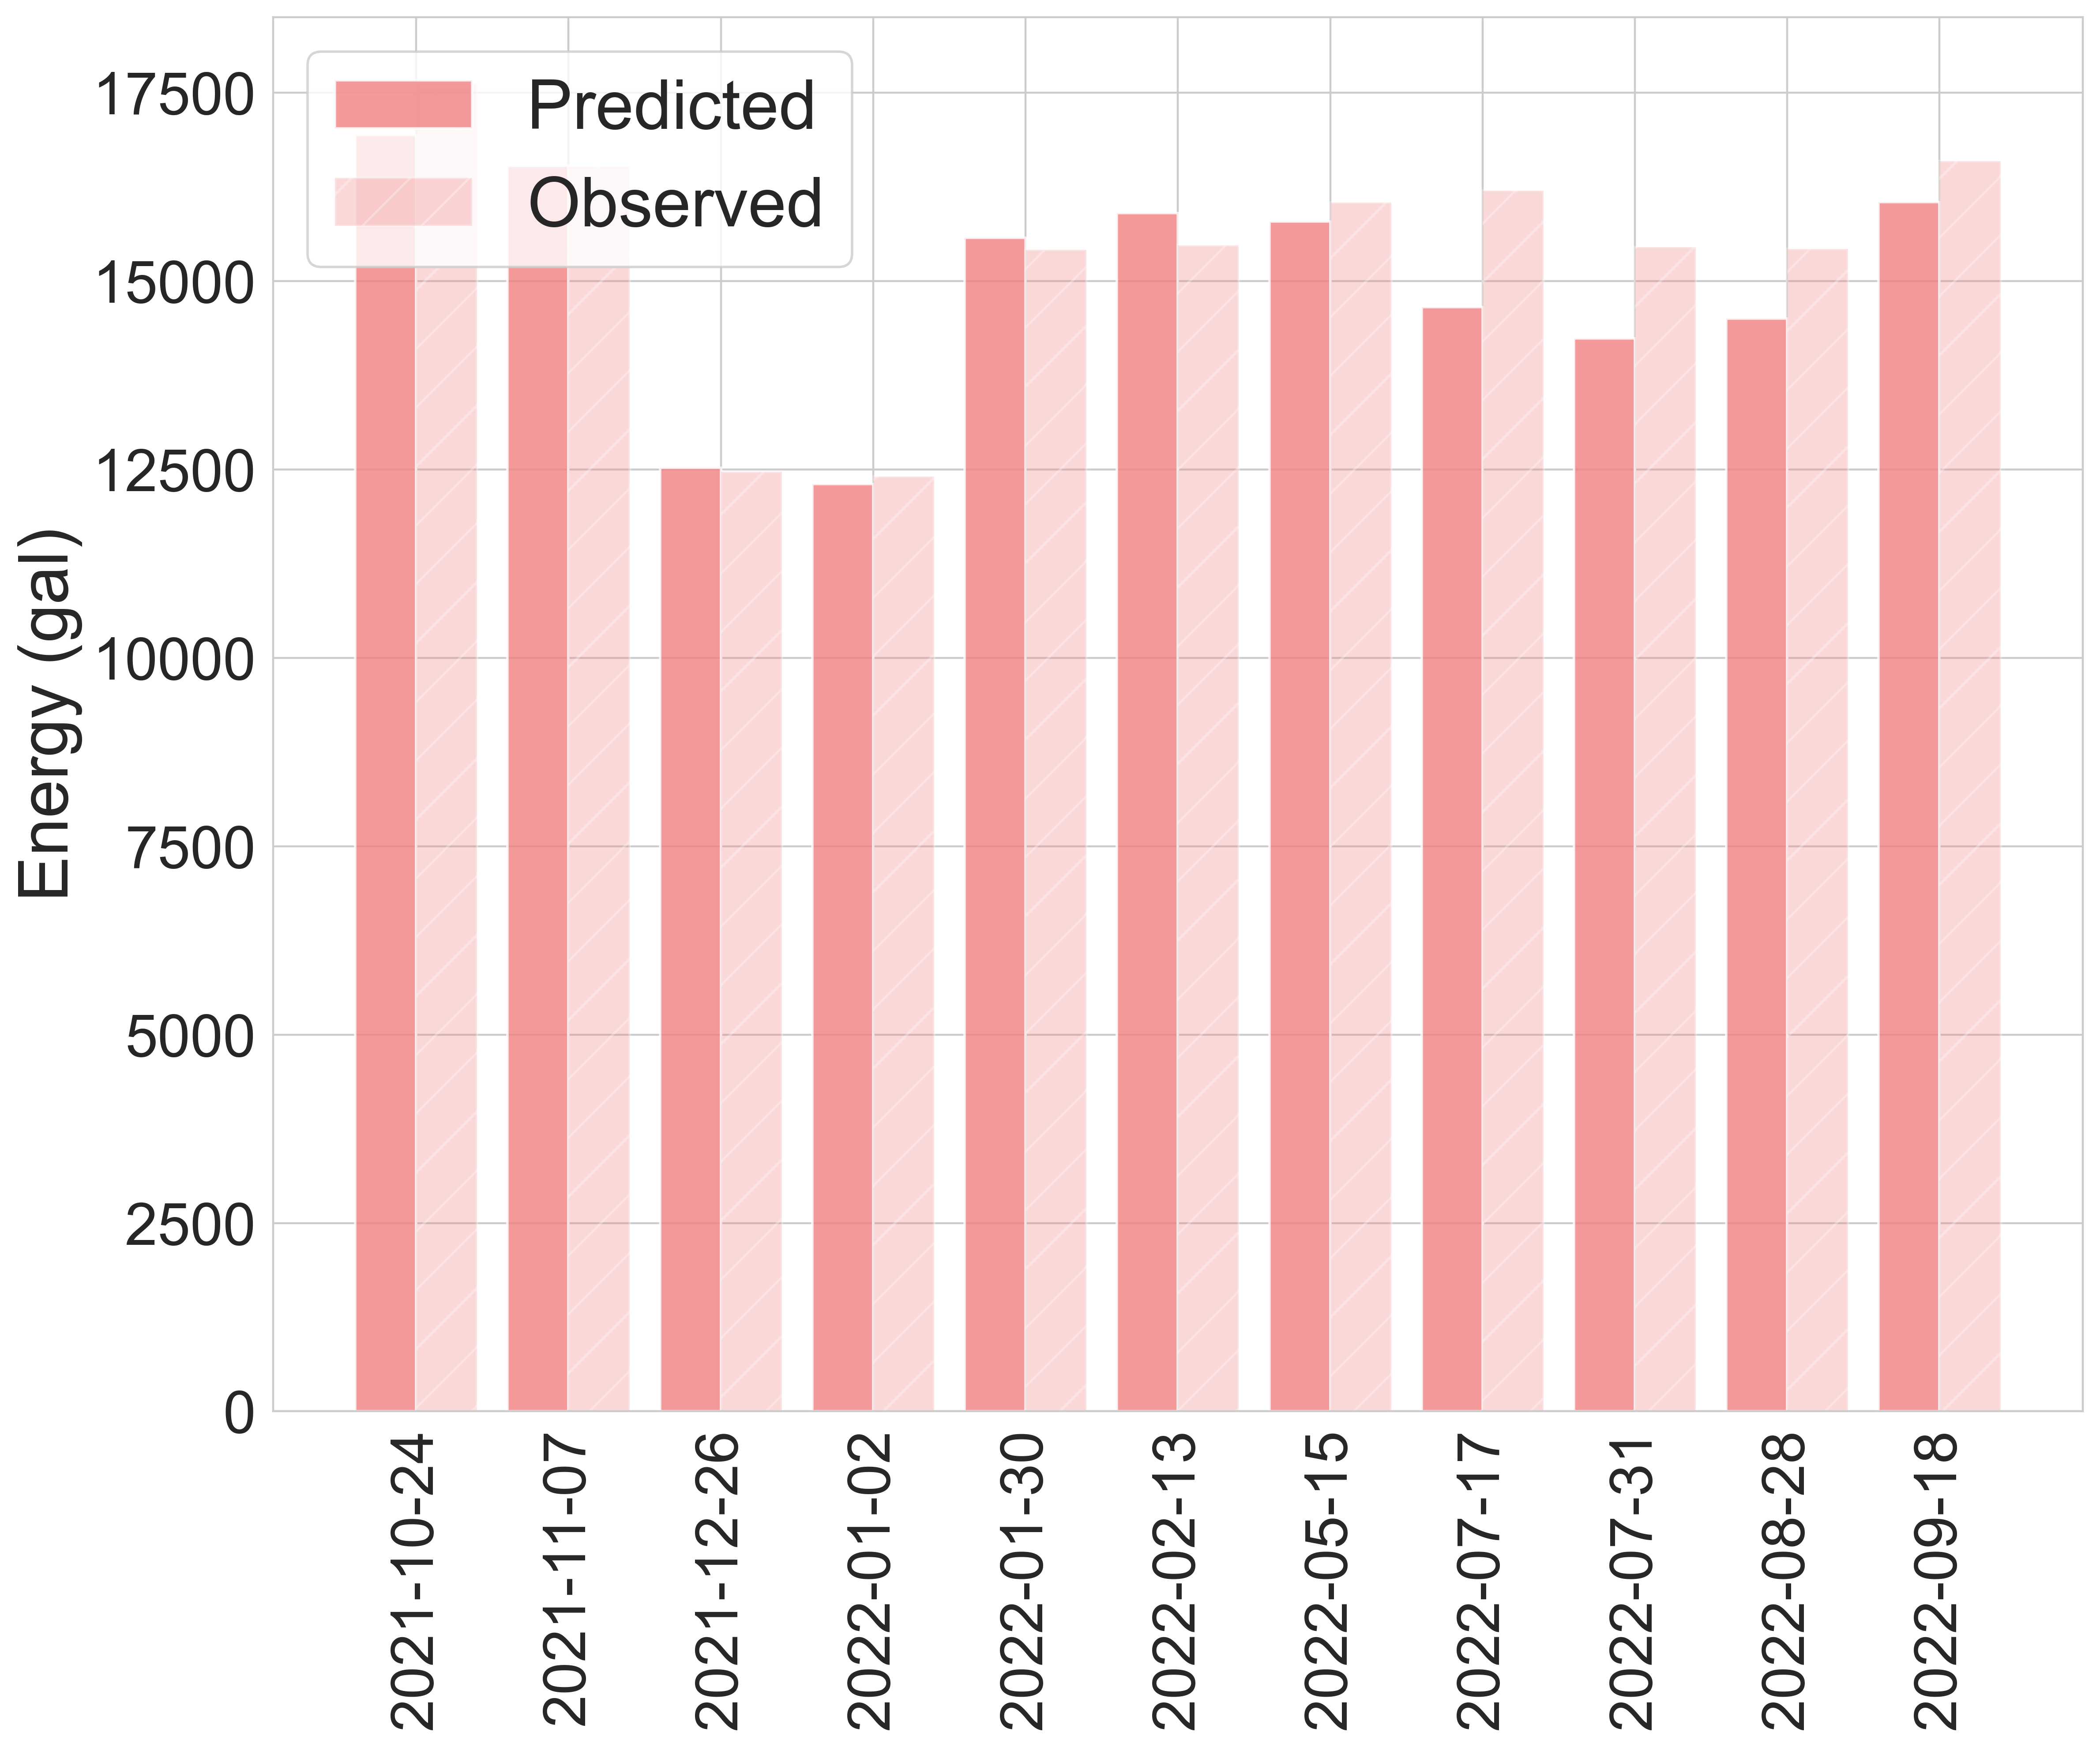

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'ServiceDateTime' is a datetime object
test_df_cdb_system['ServiceDateTime'] = pd.to_datetime(test_df_cdb_system['ServiceDateTime'])
test_df_cdb_system = test_df_cdb_system.sort_values('ServiceDateTime')


# Set 'ServiceDateTime' as index for plotting purposes
test_df_cdb_system.set_index('ServiceDateTime', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_df_cdb_system))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_df_cdb_system['Energy'], width=bar_width, color='lightcoral', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_df_cdb_system['Qty'], width=bar_width, color='lightcoral', alpha=0.3, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_df_cdb_system.index.strftime('%Y-%m-%d'), rotation=90, fontsize=24)
plt.yticks(fontsize=24)


plt.ylabel('Energy (gal)', fontsize=28)
plt.legend(fontsize=28)
plt.tight_layout() 

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-CDB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


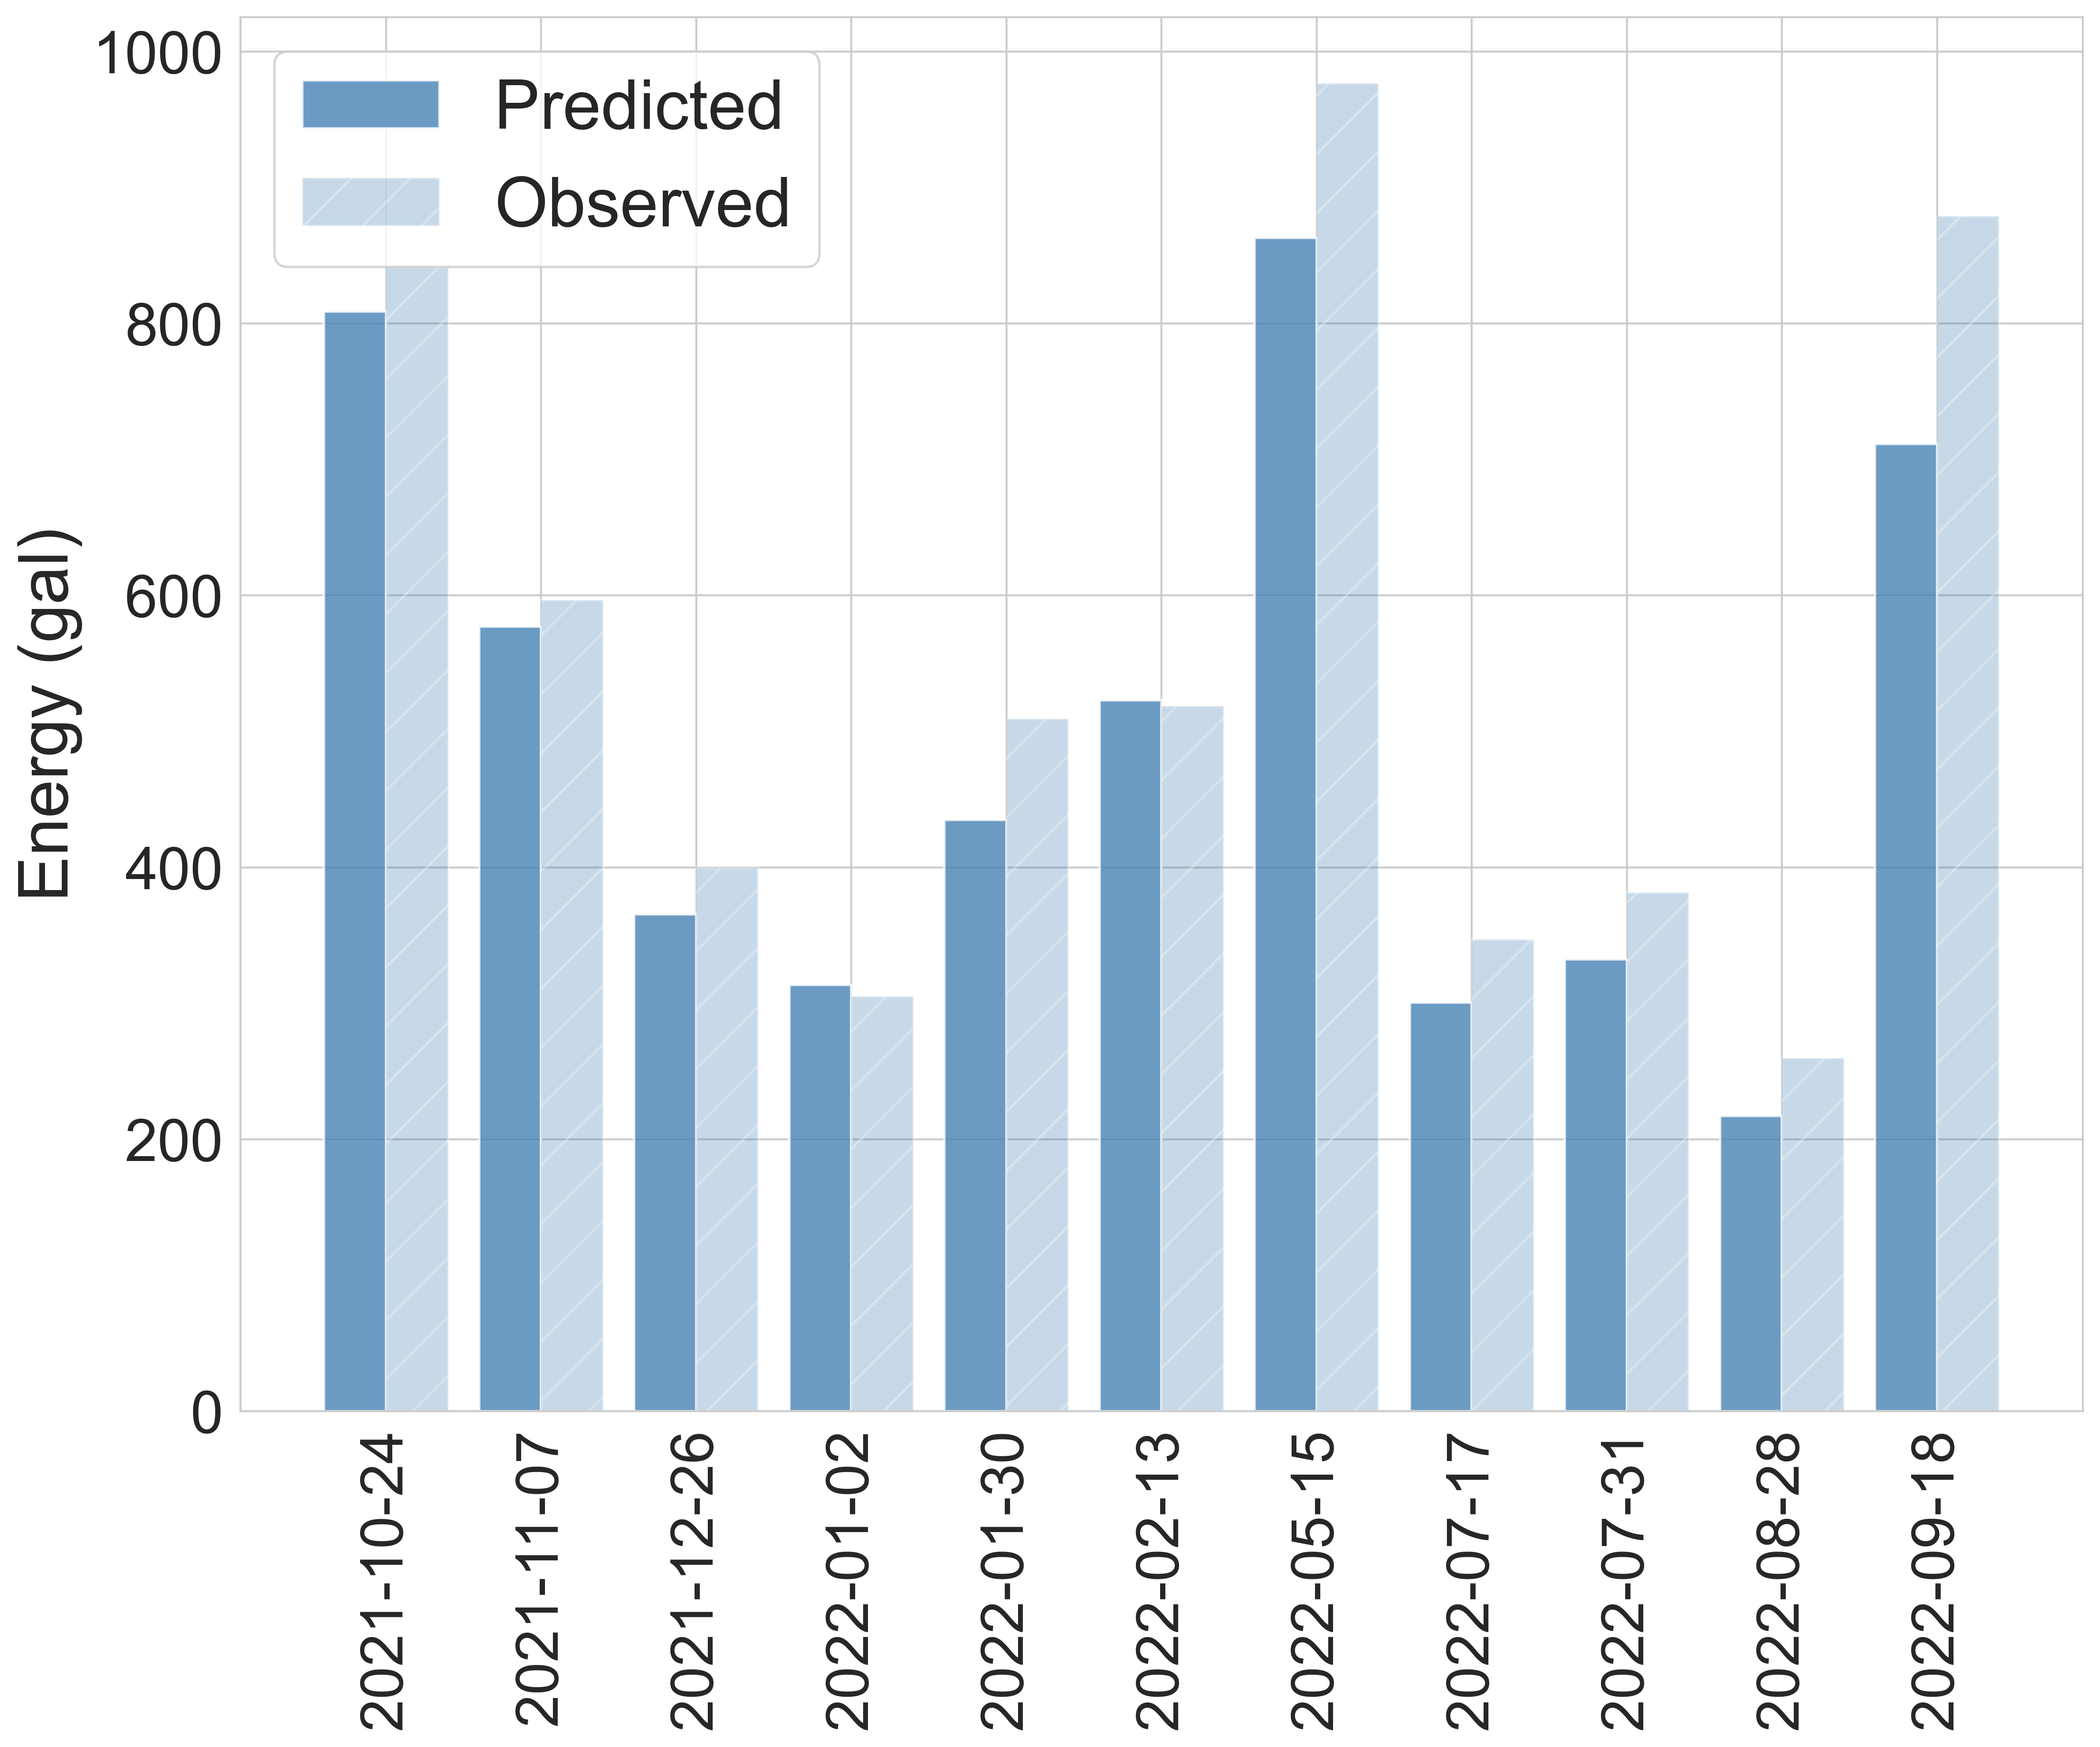

In [210]:
# Ensure 'ServiceDateTime' is a datetime object
test_df_heb_system['ServiceDateTime'] = pd.to_datetime(test_df_heb_system['ServiceDateTime'])
test_df_heb_system = test_df_heb_system.sort_values('ServiceDateTime')


# Set 'ServiceDateTime' as index for plotting purposes
test_df_heb_system.set_index('ServiceDateTime', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_df_heb_system))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_df_heb_system['Energy'], width=bar_width, color='steelblue', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_df_heb_system['Qty'], width=bar_width, color='steelblue', alpha=0.3, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_df_heb_system.index.strftime('%Y-%m-%d'), rotation=90, fontsize=24)
plt.yticks(fontsize=24)


plt.ylabel('Energy (gal)', fontsize=28)
plt.legend(fontsize=28)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-HEB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [211]:
df_heb['economy'].mean()

4.297466861094425

In [212]:
df_heb['economy'].median()

4.438947927516245

In [213]:
df_cdb['economy'].mean()

3.2770227618260503

In [214]:
df_cdb['economy'].median()

3.3223871905343736

In [215]:
### Resample hourly and compute mean and median fuel economy
df_heb.index = pd.to_datetime(df_heb.index)
df_hourly = df_heb.resample('H').sum()
df_hourly['hourly_economy'] = df_hourly['dist'] / df_hourly['Energy']
mean_hourly_economy = df_hourly['hourly_economy'].mean()
median_hourly_economy = df_hourly['hourly_economy'].median()
print(f"Mean Hourly Fuel Economy of HEB: {mean_hourly_economy}")
print(f"Median Hourly Fuel Economy of HEB: {median_hourly_economy}")

Mean Hourly Fuel Economy of HEB: 4.303058497396304
Median Hourly Fuel Economy of HEB: 4.440754062316374


In [216]:
### Resample hourly and compute mean and median fuel economy
df_cdb.index = pd.to_datetime(df_cdb.index)
df_hourly = df_cdb.resample('H').sum()
df_hourly['hourly_economy'] = df_hourly['dist'] / df_hourly['Energy']
mean_hourly_economy = df_hourly['hourly_economy'].mean()
median_hourly_economy = df_hourly['hourly_economy'].median()
print(f"Mean Hourly Fuel Economy of CDB: {mean_hourly_economy}")
print(f"Median Hourly Fuel Economy of CDB: {median_hourly_economy}")

Mean Hourly Fuel Economy of CDB: 3.238628434238518
Median Hourly Fuel Economy of CDB: 3.2480706702052964
